# Init

In [1]:
from dyback import *

def create_day_range(start_date, end_date):
    """
    Create a list of dates between start_date and end_date (inclusive).

    Args:
        start_date (str): The start date in the format "YYYY-MM-DD".
        end_date (str): The end date in the format "YYYY-MM-DD".

    Returns:
        list: A list of dates between start_date and end_date (inclusive).
    """

    start_date = dt.datetime.strptime(start_date, "%Y-%m-%d")
    end_date = dt.datetime.strptime(end_date, "%Y-%m-%d")

    days = (end_date - start_date).days + 1
    dates = [dt.datetime.strftime(start_date + dt.timedelta(days=i), "%Y-%m-%d") for i in range(days)]

    return dates

In [8]:
# files = os.listdir("../douyin-live/logs/ly")
# outfolder = "./pkls"
# files = sorted(files)
# for file in files:
#         print(file)
#         if ".txt" in file:
#                 fname1 = f"../douyin-live/logs/ly/{file}"
#                 process_log(fname1, outfolder)
#                 print("________")

## process log file

In [52]:
fname = "../douyin-live/logs/ly/log-ly_2024-10-04 15-49.txt"
outfolder = "./pkls"
fdate = fname.split("_")[1][:-4]
ftime = fname.split("_")[1][11]
dfname = f"{fname.split('_')[-1][:10]}_2" if ftime=='2' else f"{fname.split('_')[-1][:10]}_1"       

print(f"fdate: {fdate}, ftime {ftime}, dfname {dfname}")

process_log(fname, outfolder)

fdate: 2024-10-04 15-49, ftime 1, dfname 2024-10-04_1
Date  2024-10-04 15-49
新粉丝  67
场观 3253, 平均人数 102, 最高 167
 100 人以上持续时间 0.5 小时
total Gifts 8304, 送礼人数 415
small gift user: 413, value 3303, 0.40
big gift user: 2, value 5001, 0.60


{'fdate': '2024-10-04 15-49',
 'ftime': '1',
 'new_fans': 67,
 'total_visitor': 3253,
 'room_mean': 102,
 'room_max': 167,
 'duration100': 0.5,
 'totalgift': 8304,
 'giftuser': 415}

# member data

In [97]:
# chat_df = pd.read_pickle(f"{outfolder}/{fdate[:10]}_{ftime}_chats.pkl")
# bb = chat_df.copy()
# bb = bb.drop_duplicates(subset=['content'], keep='first')[-100:]
# for idx, rows in bb.iterrows():
#     print(f"{rows.timeStr}:  {rows.nickName}: {rows.content}")

In [54]:
social_df = pd.read_pickle(f"{outfolder}/{fdate[:10]}_{ftime}_social.pkl")
social_df.loc[:, 'tr'] = social_df.timeStr.apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S" ))
social_df = social_df.set_index('tr')

social_df[social_df.userLevel >30].shape[0] /social_df.shape[0], social_df[social_df.userLevel >=20].shape[0] 
# social_df.tail()

(0.04477611940298507, 25)

In [55]:
social_df[social_df.userLevel >30]

,userID,nickName,displayId,gender,userLevel,badge,userFollowing,userFollower,action,timeStr
tr,,,,,,,,,,
2024-10-04 15:56:01,1425393634778344,合家欢乐,64293972657,1,35,1,9046,3414,1,"2024-10-04 15:56:01,423"
2024-10-04 16:00:26,132390101980744,雲里雾里,69207005932,2,34,0,1334,624,1,"2024-10-04 16:00:26,891"
2024-10-04 16:09:21,103620612843,爱过痛过相爱过,1353963503,1,33,0,9968,780,1,"2024-10-04 16:09:21,416"


67

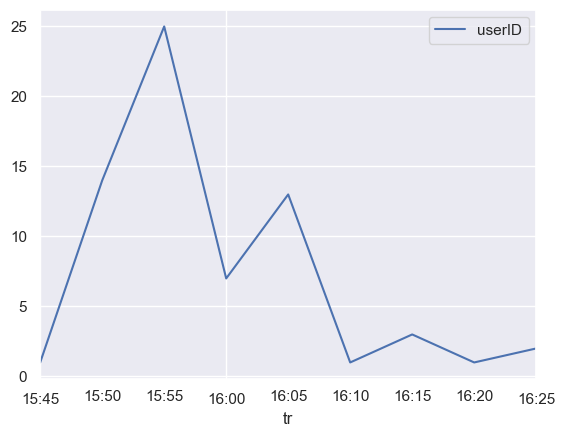

In [56]:
social_df_time = social_df.resample('5min').agg({'userID':'count'})

social_df_time.plot()
social_df_time.userID.sum()

# Read today member

,memberCount,displayId
tr,,
2024-10-04 15:45:00,49.650000,20
2024-10-04 15:50:00,86.205797,345
2024-10-04 15:55:00,106.187879,495
2024-10-04 16:00:00,121.193370,362
2024-10-04 16:05:00,128.674267,307
2024-10-04 16:10:00,126.601594,251
2024-10-04 16:15:00,129.611607,224
2024-10-04 16:20:00,128.782123,179
2024-10-04 16:25:00,111.140940,149


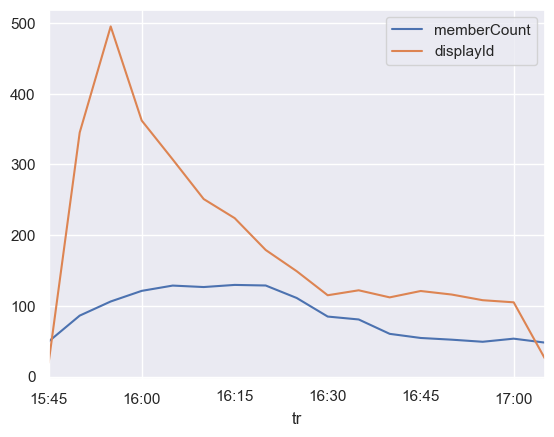

In [57]:
member_df = pd.read_pickle(f"{outfolder}/{fdate[:10]}_{ftime}_member.pkl")

member_df_m = member_df.set_index('tr').resample('5min').agg({'memberCount':'mean', 'displayId':'count'})
member_df_m.plot()
member_df_m.head(10)

In [58]:
m38 =  member_df[member_df.userLevel>39]
m38.groupby('displayId').agg({'nickName':'last', 'userLevel':'last','tr':['count', 'min', 'max'], })

nickName userLevel    tr                      \
                                last      last count                 min   
displayId                                                                  
1073095368                       王俊山        40     2 2024-10-04 16:08:28   
1189576576a                  南风不及你温柔        41     4 2024-10-04 15:51:30   
12345chws            🍑陈年往事，往事随风(过客版）        40     1 2024-10-04 16:41:52   
1489140375                 护瑶周全💚💙¹⁵⁷        45     1 2024-10-04 16:18:52   
1597578577                       陈和平        47     1 2024-10-04 15:50:07   
1991794978                      什么都没        42     1 2024-10-04 16:37:36   
26560385249          ᅟᅠ        ‍  ᅟᅠ        40     1 2024-10-04 16:30:23   
50656296786        ওᤢᤣ᭄་乐乐瑶瑶꧔💙 ¹⁵⁷ 💕        40     1 2024-10-04 16:24:51   
51628252623                 龍虎：诚信赢天下        40     1 2024-10-04 16:01:15   
5201314chenna           乐逍瑶@❤️❤️💙💙💞💖        48     1 2024-10-04 16:12:50   
578289007sung             沈酒宝刚《中国沈酒》        43     1 2024-10-04 16:36:19   
83052686499               seven girl        43     1 2024-10-04 16:18:43   
89137062         ㅤㅤ ㅤ  ㅤ           ㅤ        47     1 2024-10-04 15:59:49   
CY20220409_____               夕夕💙¹⁵⁷        44     2 2024-10-04 16:11:57   
YY77566C                   ☁️品茶悟余生☁️        43     1 2024-10-04 16:00:57   
ajie43912                       阿杰💇🔥        40     1 2024-10-04 16:01:49   
dy11urdo9qk0n                不想说话⁷⁷⁷        41     1 2024-10-04 16:35:26   
dy4bd070a4ty                   单恋一枝花        47     1 2024-10-04 16:43:49   
dyx8tfl23cd8                      1？        47     1 2024-10-04 15:59:42   
lehan31239                       武大郎        40     1 2024-10-04 16:00:21   
wadrbawkh429                 ❤️余姐姐❤️        42     1 2024-10-04 16:14:00   
wangwang200218           Samuel Wang        40     1 2024-10-04 15:53:07   
woshilubiand48          为了明天更好的生活而努力        43     1 2024-10-04 15:59:09   
yu77581314520                 南风知我意💞        43     1 2024-10-04 15:54:27   

                                     
                                max  
displayId                            
1073095368      2024-10-04 16:55:59  
1189576576a     2024-10-04 16:22:20  
12345chws       2024-10-04 16:41:52  
1489140375      2024-10-04 16:18:52  
1597578577      2024-10-04 15:50:07  
1991794978      2024-10-04 16:37:36  
26560385249     2024-10-04 16:30:23  
50656296786     2024-10-04 16:24:51  
51628252623     2024-10-04 16:01:15  
5201314chenna   2024-10-04 16:12:50  
578289007sung   2024-10-04 16:36:19  
83052686499     2024-10-04 16:18:43  
89137062        2024-10-04 15:59:49  
CY20220409_____ 2024-10-04 16:12:22  
YY77566C        2024-10-04 16:00:57  
ajie43912       2024-10-04 16:01:49  
dy11urdo9qk0n   2024-10-04 16:35:26  
dy4bd070a4ty    2024-10-04 16:43:49  
dyx8tfl23cd8    2024-10-04 15:59:42  
lehan31239      2024-10-04 16:00:21  
wadrbawkh429    2024-10-04 16:14:00  
wangwang200218  2024-10-04 15:53:07  
woshilubiand48  2024-10-04 15:59:09  
yu77581314520   2024-10-04 15:54:27

In [27]:
# member_df[member_df.displayId=='1201233930']
# member_df[member_df.nickName.str.contains('Za')]

# member_df[(member_df.userFollower.str.contains('万')) ].drop_duplicates(subset=['displayId'], keep='first')

In [33]:
# member_df[member_df.nickName.str.contains('葵')]
def read_rmuser_df(fname_rmuser):
    rmuser_df = pd.read_pickle(fname_rmuser)
    ff = fname_rmuser.split("/")[-1]
    fdayStr = ff[:10]
    print(f'fdayStr {fdayStr}, {dt.datetime.strptime(fdayStr, "%Y-%m-%d").date()}')
    rmuser_df.loc[:, 'tr'] = rmuser_df.timeStr.apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S" ))
    rmuser_df = rmuser_df[rmuser_df.timeStr.str[:10]==fdayStr]
    rmuser_df.loc[:, 'total'] = rmuser_df.total.astype(int)
    rmuser_df.loc[:, 'totalUser'] = rmuser_df.totalUser.astype(int)
    rmuser_df = rmuser_df.set_index('tr')
    return rmuser_df

rmuser_df = read_rmuser_df(f"{outfolder}/{fdate[:10]}_{ftime}_rmuser.pkl")
rmuser_df.tail()


fdayStr 2024-10-03, 2024-10-03


,total,totalUser,timeStr
tr,,,
2024-10-03 17:14:30,86,3753,"2024-10-03 17:14:30,354"
2024-10-03 17:14:34,85,3749,"2024-10-03 17:14:34,553"
2024-10-03 17:14:36,82,3753,"2024-10-03 17:14:36,340"
2024-10-03 17:14:46,87,3755,"2024-10-03 17:14:46,226"
2024-10-03 17:14:50,89,3756,"2024-10-03 17:14:50,220"


<Axes: xlabel='tr'>

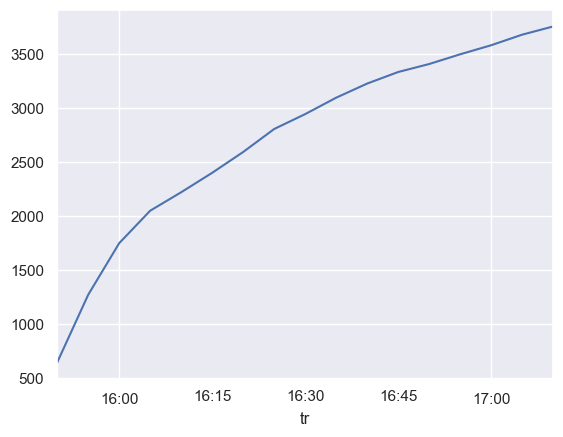

In [34]:
rmuser_1 = rmuser_df.resample('5min').agg({'totalUser':'last', 'total':'mean' })
rmuser_1.totalUser.plot()


<Axes: xlabel='tr'>

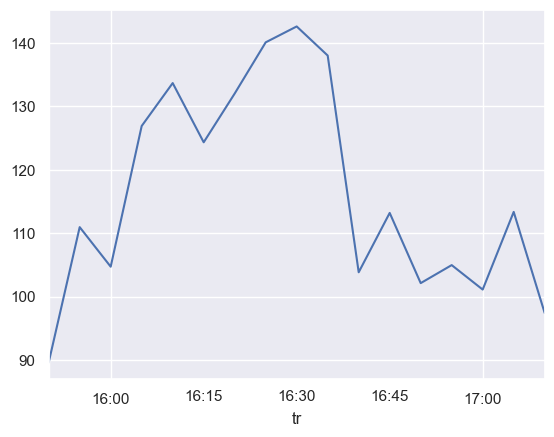

In [35]:
# (rmuser_1.total - rmuser_1.total.shift(1))
rmuser_1.total.plot()


In [341]:
member_df_m.merge(rmuser_1.total, left_index=True, right_index=True)

,memberCount,displayId,total
tr,,,


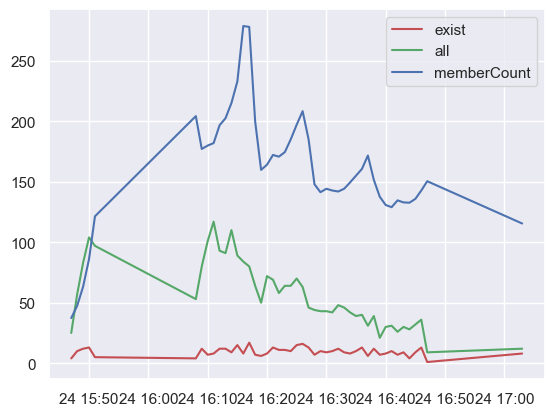

In [342]:
exist_member = member_df[member_df.badge >=1]
exist_member = exist_member.set_index('tr').resample('1min').agg({
    'userID':'count',
    'memberCount':'mean'
}).dropna()

new_member = member_df[member_df.badge ==0]
new_member = new_member.set_index('tr').resample('1min').agg({
    'userID':'count',
    'memberCount':'mean'
}).dropna()
    
all_member = member_df.set_index('tr').resample('1min').agg({
    'userID':'count',
    'memberCount':'mean'
}).dropna()

plt.plot(exist_member.userID, 'r-', label="exist")
plt.plot(all_member.userID, 'g-', label="all")
plt.plot(all_member.memberCount, 'b-', label="memberCount")
plt.legend(loc=0)
plt.show()

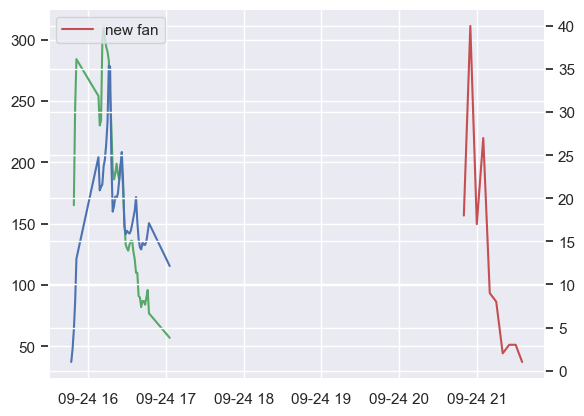

In [343]:
# member_df = member_df.drop_duplicates(subset=['userID'], keep='first')
member_m = member_df.set_index('tr').resample('1min').agg({
    'userID':'count',
    'memberCount':'mean'
}).dropna()
# member_m[member_m.memberCount <2000].plot()
member_m.loc[:, 'cumsum_in_5'] = member_m.userID.rolling(3).sum()
member_m.loc[:, 'member_leave'] = member_m.memberCount - member_m.cumsum_in_5

# plt.plot(member_m.member_leave, 'r-', label='member_leave')
plt.plot(member_m.cumsum_in_5, 'g-', label='cumsum_in_5')
plt.plot(member_m.memberCount, 'b-', label='memberCount')
pl2 = plt.twinx()
pl2.plot(social_df_time, 'r-', label="new fan")
plt.legend(loc=0)
plt.show()

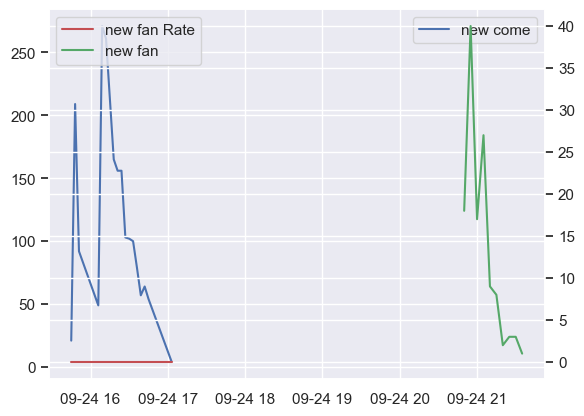

In [336]:
member_new = member_df[member_df.badge==0].set_index('tr').resample('3min').agg({
    'userID':'count',
    'memberCount':'mean'
}).dropna()
# member_m[member_m.memberCount <2000].plot()
member_new.loc[:, 'new_fan_rate'] = np.round(social_df_time.userID * 100 / member_new.userID, 2).fillna(0)
# member_new.loc[:, 'member_leave'] = member_new.memberCount - member_new.cumsum_in_5

# plt.plot(member_new.userID, 'r-', label='new come')
# plt.plot(member_new.cumsum_in_5, 'g-', label='cumsum_in_5')
plt.plot(member_new.userID, 'b-', label='new come')
plt.legend(loc=1)

pl2 = plt.twinx()
pl2.plot(member_new.new_fan_rate, 'r-', label='new fan Rate')
pl2.plot(social_df_time.userID, 'g-', label='new fan')

pl2.legend(loc=0)
plt.show()
# member_new
# member_new.join(social_df_time.userID, rsuffix='_new')

In [248]:
# member_new.head(90)

In [ ]:
mmx = member_m.merge(high_member, left_index=True, right_index=True, suffixes=('_m', '_high'))
mmx.tail()

In [ ]:
member_m.loc[:,'stay_chg'] = member_m.memberCount.diff()
member_m.loc[:,'leave'] = member_m.userID - member_m.stay_chg


In [15]:
# member_df[member_df.nickName.str.contains('影')]

In [ ]:

plt.plot(member_m.userID, 'r-',  label='come')
plt.plot(member_m.memberCount, 'g-', label='count')
# plt.plot(member_m.memberCount, 'b-', label='no')
plt.legend(loc=2)
plt.show()


In [169]:
mmt = member_m[member_m.memberCount >=150].index
mmt[-1]-mmt[0]

Timedelta('0 days 00:15:00')

12384

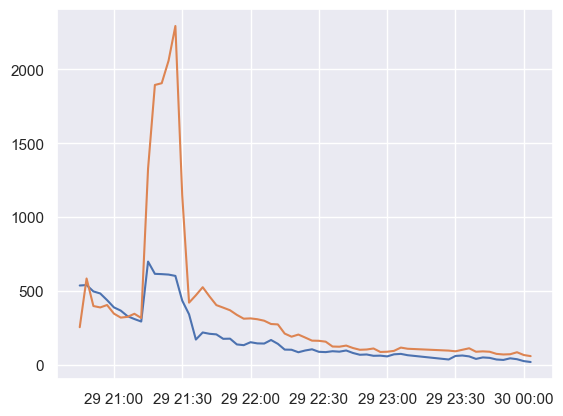

In [182]:
member_df_30 = member_df[member_df.userLevel >= 0].set_index('tr').resample('3min').agg({
    'userID':'count',
    'memberCount':'mean'
}).dropna()

member_df_10 = member_df[member_df.userLevel < 30].set_index('tr').resample('3min').agg({
    'userID':'count',
    'memberCount':'mean'
}).dropna()
plt.plot(member_df_30.userID)
plt.plot(member_df_10.memberCount)
member_df_30.userID.sum()

<Axes: xlabel='tr'>

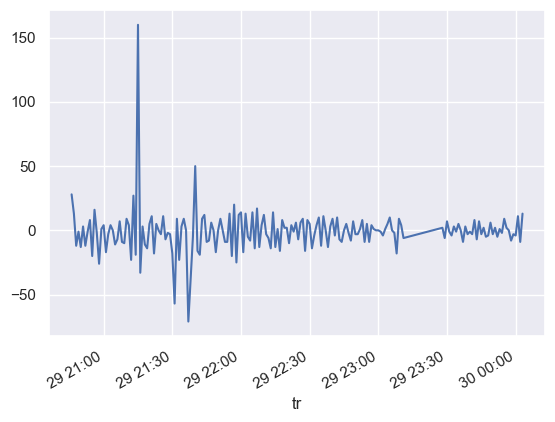

In [183]:
member_m.loc[:,'chg'] = member_m.userID.diff()
member_m.chg.plot()

# Today Gift

In [36]:
gift_df = pd.read_pickle(f"{outfolder}/{fdate[:10]}_{ftime}_gifts.pkl")
gift_df = gift_df.set_index('tr')

gift_df.tail()

,userID,nickName,displayId,userLevel,badge,userFollowing,userFollower,giftName,giftD,sendType,clientGiftSource,time,timeStr
tr,,,,,,,,,,,,,
2024-10-03 17:13:03,64203736722,心想事成,Z7286H,23,0,635,634,送出点亮粉丝团,1,None,1,1727946779534,"2024-10-03 17:13:03,319"
2024-10-03 17:13:03,64203736722,心想事成,Z7286H,23,9,635,634,送出粉丝团灯牌,1,1,1,1727946782426,"2024-10-03 17:13:03,320"
2024-10-03 17:13:15,607389098971336,豆豆妈上午9点30首播,30719409132,24,2,2091,3691,送出粉丝团灯牌,1,1,1,1727946794067,"2024-10-03 17:13:15,090"
2024-10-03 17:13:45,1341053701465027,独道,dyzzsaw990tg,36,8,117,65,送出粉丝团灯牌,1,1,1,1727946824204,"2024-10-03 17:13:45,448"
2024-10-03 17:13:50,59200552151,baby💙,26033258,25,14,371,451,送出粉丝团灯牌,1,1,1,1727946829089,"2024-10-03 17:13:50,213"


In [37]:
gift_df[gift_df.giftD>100].tail()


,userID,nickName,displayId,userLevel,badge,userFollowing,userFollower,giftName,giftD,sendType,clientGiftSource,time,timeStr
tr,,,,,,,,,,,,,
2024-10-03 17:02:20,99083529579,🇨🇳苏哥🐅,1332788972,42,9,2793,1615,送出比心兔兔,299,5,1,1727946138576,"2024-10-03 17:02:20,036"
2024-10-03 17:04:18,67673363851,🌈钰見瑶葵宝💚💙¹⁵⁷,513413149aini,34,15,84,498,气氛high起来,199,5,1,1727946257099,"2024-10-03 17:04:18,003"
2024-10-03 17:04:24,1728864648961191,星夜,83005417913,32,10,1503,343,气氛high起来,199,5,1,1727946263796,"2024-10-03 17:04:24,553"
2024-10-03 17:07:14,65357073945,👑 Queen 👑,Dudujy520U,56,0,202,3.2万,送出黑色战马,1299,1,1,1727946433590,"2024-10-03 17:07:14,745"
2024-10-03 17:08:43,1234125352358648,芝士🧀宝宝,zhishibaobao122,45,0,5,4,送出跑车,1200,1,1,1727946522405,"2024-10-03 17:08:43,834"


In [38]:
# gift_df[:'2024-07-03 16:30'].giftD.plot()
# gift by user
gift_user = gift_df.groupby('nickName').agg({
    'giftD':'sum',
    'displayId':'last',
    'userLevel':'max',
    'badge':'max'
}).sort_values(['giftD'], ascending=0)
gift_user[:20]

,giftD,displayId,userLevel,badge
nickName,,,,
👑 Queen 👑,1299,Dudujy520U,56,0
芝士🧀宝宝,1200,zhishibaobao122,45,0
十二💚💙¹⁵⁷,1034,ojbvqxjxe,38,17
懒虫🍬❓💙¹⁵⁷,801,90761439981,21,11
🌈钰見瑶葵宝💚💙¹⁵⁷,613,513413149aini,34,15
星夜,432,83005417913,32,10
🇨🇳苏哥🐅,307,1332788972,42,9
粉凤凰💙157,302,70654242320,35,16
🌻成🌻,298,571780419,35,15


In [23]:
gift_df[gift_df.displayId=='ydyxf12345']


,userID,nickName,displayId,userLevel,badge,userFollowing,userFollower,giftName,giftD,sendType,clientGiftSource,time,timeStr
tr,,,,,,,,,,,,,


In [28]:
rqp = gift_df[gift_df.giftName.str.contains('人气票')]

<Axes: xlabel='tr'>

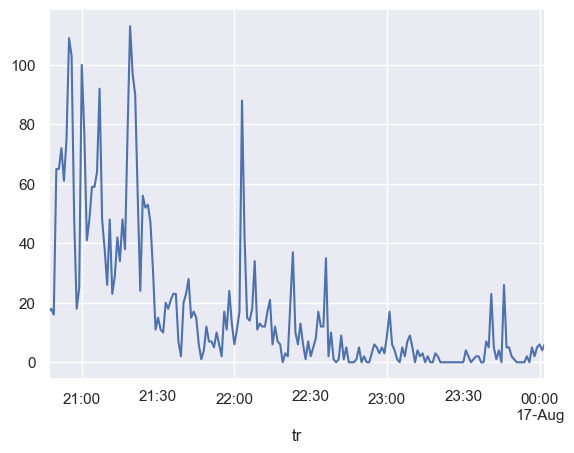

In [199]:
gift_df_sum = gift_df.resample('1min').agg({
    'nickName':'last',
    'displayId':'last',
    'giftD':'sum',
    'nickName':'count'
    
})
gift_df_sum.nickName.plot()

<Axes: xlabel='tr'>

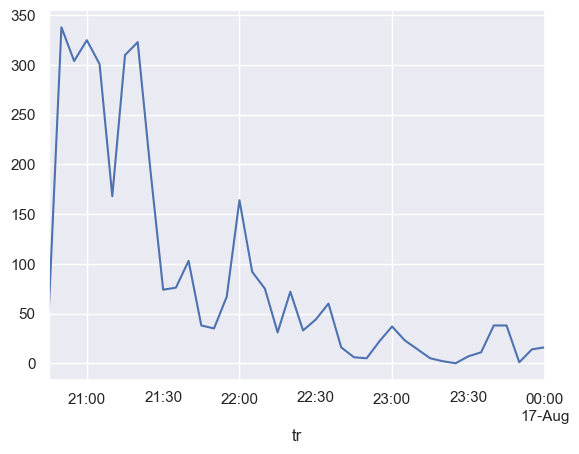

In [202]:
gift_df_tm = gift_df.resample('5min').agg({
    'displayId':'count',
    'giftD':'sum'
})
gift_df_tm.displayId.plot()

# Likes

In [364]:
like_df = pd.read_pickle(f"{outfolder}/{fdate[:10]}_{ftime}_likes.pkl")
like_df.shape


(5391, 11)

In [369]:
# like_df.tail()
like_summary = like_df.groupby('nickName').agg({'nickName':'last', 'count':'sum'}).sort_values(['count'], ascending=[0])
like_summary.columns=['nickName', 'likeCount']
print(like_summary.head(20))

llc = like_summary.likeCount.transform(lambda x: pd.cut(x, bins = [0, 500, 1500, 9000], labels=['500', '1500', '1500+']))
like_summary.groupby(llc).count()

                    nickName  likeCount
nickName                               
乐瑶妹妹💙¹⁵⁷            乐瑶妹妹💙¹⁵⁷       3053
勇往直前！                  勇往直前！       1844
এ᭄ོ局外人/ꦿ࿐          এ᭄ོ局外人/ꦿ࿐       1478
🍐闲听筝雨💙¹⁵⁷          🍐闲听筝雨💙¹⁵⁷       1427
Daisc                  Daisc       1344
海阔凭鱼跃                  海阔凭鱼跃       1130
💙•᷄ࡇ•᷅蓝莓汁.¹⁵⁷  💙•᷄ࡇ•᷅蓝莓汁.¹⁵⁷       1060
人间仙境                    人间仙境       1022
十二💚💙¹⁵⁷              十二💚💙¹⁵⁷        862
樂圆💙                      樂圆💙        844
老顽童啊！                  老顽童啊！        770
开心就好😀平安是福          开心就好😀平安是福        646
破刃之剑                    破刃之剑        646
清风阁                      清风阁        636
万里黄河                    万里黄河        624
谜团                        谜团        623
戒不掉你的傻笑づ776      戒不掉你的傻笑づ776        591
✌️赢就对了✌              ✌️赢就对了✌        578
陈哥                        陈哥        576
天空之城💙¹⁵⁷            天空之城💙¹⁵⁷        549


,nickName,likeCount
likeCount,,
500,190,190
1500,23,23
1500+,2,2


In [205]:
# like_summary[like_summary.likeCount>1000]
like_summary[like_summary.nickName.str.contains('妍')]

,nickName,likeCount
nickName,,
妍,妍,156
妍2,妍2,147
妍1,妍1,29


# member history 1

In [197]:
def daily_member(dayStr, t, outfolder):
    try:
        member_df = pd.read_pickle(f"{outfolder}/{dayStr}_{t}_member.pkl")
        max_member = member_df.memberCount.max()
        member_user = member_df.groupby('displayId').agg({
            'nickName': 'last',
            'displayId':'first',
            'userID':'count',
            'badge': 'last',
            'userLevel':'last',
            'tr':'first'
            })
        member_user.loc[:,'hrs'] = member_user.tr.apply(lambda x:(pd.to_datetime(x)).hour)
        member_user.loc[:,'mins'] = member_user.tr.apply(lambda x:(pd.to_datetime(x)).minute)
        return member_user[member_user.userID>1], max_member
    except:
        return
    
    
dayStrList = create_day_range("2024-04-01", "2024-04-30")

member_his_df = pd.DataFrame()
# print(dayStrList)
tt_show = 0
sum_max_member = 0
for dd in dayStrList:
    for t in ["1", "2"]:
        try:
            df, max_member = daily_member(dd, t, outfolder=outfolder)
            print(f"{dd}, {t}:  max_member {max_member}")
            if df is not None:
                tt_show += 1
            
        except Exception as e:
            # print(e)   
            continue
        member_his_df = pd.concat([member_his_df, df], ignore_index=True)
        sum_max_member += max_member
member_his_df.shape, tt_show, sum_max_member

2024-04-02, 2:  max_member 404
2024-04-03, 1:  max_member 584
2024-04-03, 2:  max_member 3151
2024-04-07, 1:  max_member 1206
2024-04-07, 2:  max_member 652
2024-04-08, 1:  max_member 2333
2024-04-08, 2:  max_member 1726
2024-04-10, 1:  max_member 3169
2024-04-10, 2:  max_member 682
2024-04-11, 1:  max_member 1029
2024-04-11, 2:  max_member 246
2024-04-12, 1:  max_member 84
2024-04-12, 2:  max_member 1921
2024-04-14, 2:  max_member 4908
2024-04-15, 2:  max_member 9033
2024-04-16, 1:  max_member 2805
2024-04-16, 2:  max_member 1138
2024-04-17, 1:  max_member 1792
2024-04-18, 1:  max_member 251
2024-04-18, 2:  max_member 180
2024-04-19, 1:  max_member 436
2024-04-19, 2:  max_member 408
2024-04-21, 2:  max_member 215
2024-04-22, 1:  max_member 233
2024-04-22, 2:  max_member 4058
2024-04-23, 2:  max_member 1237
2024-04-24, 1:  max_member 6146
2024-04-24, 2:  max_member 1484
2024-04-25, 1:  max_member 2711
2024-04-25, 2:  max_member 918
2024-04-26, 1:  max_member 3080
2024-04-26, 2:  max_me

((24281, 8), 37, 63272)

In [145]:
# member_his_df.head()

In [207]:
member_visit = np.histogram(member_his_df.userID, bins=[0, 3, 6, 8, 12,1999])
member_visit, member_visit[0][3:].sum()

((array([11657,  5571,   737,   454,   312]),
  array([   0,    3,    6,    8,   12, 1999])),
 766)

In [208]:
np.histogram(member_his_df.badge, bins=[0, 5, 10,  12, 30, 99])


(array([14792,  2544,   875,   514,     6]), array([ 0,  5, 10, 12, 30, 99]))

In [198]:
member_his_summary = member_his_df.groupby('displayId').agg({
            'nickName': 'last',
            'userID':'count',
            'badge': 'last',
            'userLevel':'last

,nickName,userID,badge,userLevel,displayId
displayId,,,,,
000000111111FA,ab80011,2,0,13,000000111111FA
004wok,培 林,1,0,9,004wok
0101010101qj,🇨🇳户外🇨🇳,1,0,32,0101010101qj
012345678_m,18°,2,5,12,012345678_m
050120dan,天分少女,1,0,16,050120dan
...,...,...,...,...,...
zz18300130533,向前冲888,1,1,32,zz18300130533
zzd1234567888,逸云,2,0,20,zzd1234567888
zzk2299499,🌈 周子钶(ke,1,0,16,zzk2299499


In [ ]:
',
            'displayId':'first',
            
            })

member_his_summary

In [201]:
member_his_summary[
    (member_his_summary.displayId.str.contains('dyrrj6ci32a1'))
    # &
    # (member_his_summary.userLevel==36)
                   ]

,nickName,userID,badge,userLevel,displayId
displayId,,,,,
dyrrj6ci32a1,Zaza哥哥,37,15,37,dyrrj6ci32a1


In [210]:
np.histogram(member_his_summary.badge, bins=[0, 2, 5, 10,  12, 30])


(array([9563,  800,  591,  143,   77]), array([ 0,  2,  5, 10, 12, 30]))

In [211]:
member_his_summary[member_his_summary.userID >= 4 ].sort_values(['userID'], ascending=[0])

,nickName,userID,badge,userLevel,displayId
displayId,,,,,
dyrrj6ci32a1,Zaza哥哥 一直在…,23,19,43,dyrrj6ci32a1
27769706206,不是表哥,23,16,36,27769706206
859722615,xu,22,10,21,859722615
MBYD54055533,暮色心约,22,9,30,MBYD54055533
kuidabusi,葵宝L·💚💙¹⁵⁷,22,16,32,kuidabusi
...,...,...,...,...,...
dyifz4cuez0o,阿慧🎤,4,0,19,dyifz4cuez0o
42782968958,李望天,4,0,25,42782968958
43067168627,粤,4,0,28,43067168627


In [212]:
member_v_cut = pd.cut(member_his_summary.userID, bins=[0,3, 10, 15,99])
vv = member_his_summary.groupby([member_v_cut]).count()
print(vv)

          nickName  userID  badge  userLevel  displayId
userID                                                 
(0, 3]       10269   10269  10269      10269      10269
(3, 10]        765     765    765        765        765
(10, 15]        99      99     99         99         99
(15, 99]        41      41     41         41         41


In [202]:
# member_his_df[member_his_df.nickName.str.contains('爱吃坚果的')]
member_his_df[member_his_df.displayId.str.contains('dyrrj6ci32a1')]



,nickName,displayId,userID,badge,userLevel,tr,hrs,mins
692,Notch闹趣…,dyrrj6ci32a1,18,13,35,2024-04-02 20:43:19,20,43
1415,Notch闹趣…,dyrrj6ci32a1,7,13,35,2024-04-03 16:31:50,16,31
2454,Notch闹趣…,dyrrj6ci32a1,18,13,35,2024-04-03 20:53:31,20,53
3360,Zaza哥哥,dyrrj6ci32a1,11,13,35,2024-04-07 16:31:59,16,31
4335,Zaza哥哥,dyrrj6ci32a1,19,13,36,2024-04-07 20:48:42,20,48
5134,Zaza哥哥,dyrrj6ci32a1,10,13,36,2024-04-08 16:40:38,16,40
5913,Zaza哥哥,dyrrj6ci32a1,8,13,36,2024-04-08 20:44:10,20,44
6544,Zaza哥哥,dyrrj6ci32a1,14,14,36,2024-04-10 16:36:13,16,36
7386,Zaza哥哥,dyrrj6ci32a1,11,14,36,2024-04-10 20:36:41,20,36
8172,Zaza哥哥,dyrrj6ci32a1,3,14,36,2024-04-11 16:45:33,16,45


## analysis daily result

In [154]:
# new fans


# total gift


# room visitor


288

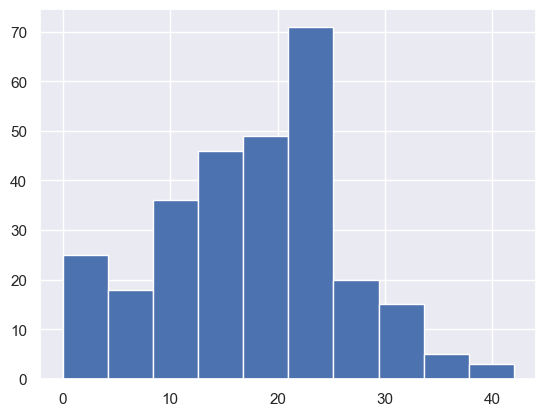

In [390]:
social_df.loc[:, 'userLevel'] = social_df.userLevel.astype(int)
social_df.userLevel.hist()
social_df[social_df.action=="1"].shape[0]

In [214]:
# social_df[social_df.userLevel>1].shape
# rmuser_df.tail()

from datetime import date

def calculate_weeks(date1, date2):
  """
  Calculates the number of weeks between two dates.

  Args:
      date1: The first date (start date).
      date2: The second date (end date).

  Returns:
      The number of weeks between the two dates.
  """
  delta = date2 - date1
  return delta.days // 7

# Example usage
date1 = date(2024, 9, 13)
date2 = date(2025, 5, 26)

weeks_between = calculate_weeks(date1, date2)
print(weeks_between)


36


In [157]:
tt = []

for line in lines[:]:
    if 'unPackWebcastSocialMessage' in line:
        data = get_json(line)
        # print(data)
        tt.append(data)
        # match = re.search(r"\[.*\]", line)
        # if match is None:
        #     continue
        # # 获取匹配的内容
        # content = match.group()
        # # 将内容转换成 JSON 对象
        # json_object = json.loads(content)
        
print(f"total {len(tt)}")
# like_df = pd.DataFrame(tt)

NameError: name 'lines' is not defined

# get history

In [9]:
files = os.listdir("../douyin-live/logs/ly")
outfolder = "./pkls"
files = sorted(files)
his_data = []
for file in files:
        # print(file)
        if ".txt" in file:
                fname = f"../douyin-live/logs/ly/{file}"
                dayStr = fname.split("_")[1][:10]
                ftime = fname.split(" ")[1][:1]
                # print(f"{outfolder}/{dayStr}_{ftime}_gifts_df.pkl")
                try:
                        data = get_key_features(outfolder, dayStr,ftime)
                        his_data.append(data)
                except Exception as e:
                        print(f"err {e}")
                        continue
                
                
print(f"{len(his_data)}")
his_df = pd.DataFrame(his_data)
his_df.shape

err [Errno 2] No such file or directory: './pkls/2024-08-23_2_gifts.pkl'
err [Errno 2] No such file or directory: './pkls/2024-09-02_1_gifts.pkl'
249


(249, 17)

In [10]:
print(his_df.columns)
his_df.tail()

Index(['dayStr', 'timeStr', 'new_fans', 'high_level_fans', 'visitor_high_num',
       'total_visitor', 'room_mean', 'room_max', 'duration100', 'totalgift',
       'giftuser', 'small_gift_user', 'small_gift_value', 'small_gift_pct',
       'big_gift_user', 'big_gift_value', 'big_gift_pct'],
      dtype='object')


,dayStr,timeStr,new_fans,high_level_fans,visitor_high_num,total_visitor,room_mean,room_max,duration100,totalgift,giftuser,small_gift_user,small_gift_value,small_gift_pct,big_gift_user,big_gift_value,big_gift_pct
244,2024-09-26,1,175,1,87,12630,195,2626,1.42,11374,732,720,3638,0.32,12,7736,0.68
245,2024-09-26,2,124,4,48,10781,141,1373,1.42,51397,653,636,3238,0.06,17,48159,0.94
246,2024-09-29,2,167,7,46,8841,165,602,1.92,12911,856,835,3265,0.25,21,9646,0.75
247,2024-09-30,1,212,13,63,8543,166,487,1.67,10985,830,814,3347,0.30,16,7638,0.70
248,2024-09-30,2,71,2,28,4166,103,184,0.50,5527,366,358,1331,0.24,8,4196,0.76


/var/folders/9x/203dlgjj1l7d1y0l8gpsm65r0000gn/T/ipykernel_39201/2465888678.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  his_df.loc[:, 'days'] = his_df.dayStr.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


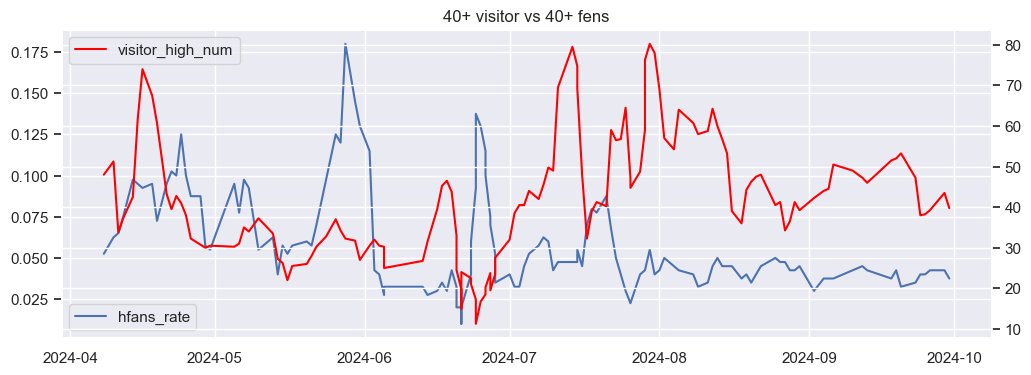

In [30]:
his_df.loc[:, 'days'] = his_df.dayStr.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
nhis = his_df.loc[his_df.timeStr=='2',:].set_index('days').dropna()

nhis.loc[:,'hfans_rate'] = np.round(nhis.high_level_fans / nhis.new_fans, 2)


plt.figure(figsize=(12,4))
plt.plot(nhis.hfans_rate.rolling(4).mean(), 'b-', label = "hfans_rate")
plt.legend(loc=3)
pl2 = plt.twinx()
pl2.plot(nhis.visitor_high_num.rolling(4).mean(), 'red', label = "visitor_high_num")
plt.legend(loc=2)
plt.title("40+ visitor vs 40+ fens")
plt.show()

In [ ]:
nhis.tail()

# History Gifts

## get history kpi

In [2]:
def get_his_df(dayStr, timeStr, outfolder=outfolder):
    # for ff in ['_gifts', '_member', 'social', 'rmuser']
    gift =   pd.read_pickle(f"{outfolder}/{dayStr}_{timeStr}_gifts.pkl")
    member =   pd.read_pickle(f"{outfolder}/{dayStr}_{timeStr}_member.pkl")
    social =   pd.read_pickle(f"{outfolder}/{dayStr}_{timeStr}_social.pkl")
    rmuser =   pd.read_pickle(f"{outfolder}/{dayStr}_{timeStr}_rmuser.pkl")
    giftZ = gift[gift.giftName.str.contains('钻')]
    gift_ = gift[~gift.giftName.str.contains('钻')]
    giftZ.loc[:, 'giftD'] = giftZ.giftName.apply(diamond_adjust)
    gift_2 = pd.concat([gift_, giftZ], ignore_index=True)
    
    # gift.loc[gift.giftName.str.contains('钻'):, 'giftD'] = gift.giftName.apply(diamond_adjust)
    gift_summary = gift_2.groupby('displayId').agg({
        'giftD':'sum',
        'nickName':'last',
        'displayId':'count'
        
    })
    new_fans = social[social.action=="1"].shape[0]
    rmuser_df_2 = rmuser.resample('5min').agg({'total':'mean', 'totalUser':'max'}).dropna()
    try:
        rmuser_df_2 = rmuser_df_2.astype(int)
        rmss = rmuser_df_2[rmuser_df_2.total >=100]
        if len(rmss) >=2:
            duration100 = round((rmss.index[-1]- rmss.index[0]).total_seconds() / 3600, 2)
        else:
            duration100 = 0
    except:
        print("error" , fname)
        duration100 = 0
    total_visitor = rmuser.totalUser.max()
    room_mean = int(rmuser.total.mean())

    totalgift = gift.giftD.sum()
    gift_by_user = gift.groupby(['displayId']).agg({'giftD':'sum', 'timeStr':'count'})
    giftuser = gift_by_user.shape[0]
    # small gift user sum
    small_gift = gift_by_user.loc[gift_by_user.giftD < 100]
    big_gift = gift_by_user.loc[gift_by_user.giftD > 599]
    return dict(
        dayStr = dayStr,
        timeStr = timeStr,
        new_fans = new_fans,
        total_visitor = total_visitor,
        room_mean = room_mean,
        room_max = rmuser.total.max(),
        duration100 = duration100,
        totalgift = totalgift,
        giftuser = giftuser,
        small_gift_user =small_gift.shape[0],
        small_gift_value = small_gift.giftD.sum(),
        small_gift_pct =round(small_gift.giftD.sum()/(totalgift+1), 2),
        big_gift_user =big_gift.shape[0],
        big_gift_value = big_gift.giftD.sum(),
        big_gift_pct =round(big_gift.giftD.sum()/(totalgift+1), 2),
    )

dayStrList = create_day_range("2024-08-01", "2024-09-30")

all_his_data = []
no_gift_day = 0
for dd in dayStrList:
    for t in ["1", "2"]:
        try:
            res = get_his_df(dd, t, outfolder=outfolder)
            # df = get_giftuser_his(dd, t, outfolder=outfolder)
            # print(res)
            no_gift_day += 1
            if res is not None:
                all_his_data.append(res)
        except Exception as e:
            # print(dd,e)   
            continue
            
        
all_his_df = pd.DataFrame(all_his_data)
        
all_his_df = all_his_df.set_index('dayStr')
        
all_his_df.shape

/var/folders/9x/203dlgjj1l7d1y0l8gpsm65r0000gn/T/ipykernel_47416/3311560113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giftZ.loc[:, 'giftD'] = giftZ.giftName.apply(diamond_adjust)
/var/folders/9x/203dlgjj1l7d1y0l8gpsm65r0000gn/T/ipykernel_47416/3311560113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giftZ.loc[:, 'giftD'] = giftZ.giftName.apply(diamond_adjust)
/var/folders/9x/203dlgjj1l7d1y0l8gpsm65r0000gn/T/ipykernel_47416/3311560113.py:9: SettingWithCopyWarning: 
A value is trying to be set

(76, 14)

In [256]:
all_his_df.tail()

,timeStr,new_fans,total_visitor,room_mean,room_max,duration100,totalgift,giftuser,small_gift_user,small_gift_value,small_gift_pct,big_gift_user,big_gift_value,big_gift_pct
dayStr,,,,,,,,,,,,,,
2024-09-19,1,272,10124,289,920,1.25,9361,924,916,5397,0.58,1,1504,0.16
2024-09-19,2,132,7278,153,402,2.17,20257,699,683,3440,0.17,6,11746,0.58
2024-09-20,1,199,9986,220,836,1.75,23685,755,740,3049,0.13,8,18857,0.80
2024-09-20,2,139,11028,159,1555,1.58,165727,595,573,2118,0.01,10,159924,0.96
2024-09-23,2,123,8627,198,3747,0.58,3778,449,439,1356,0.36,0,0,0.00


/var/folders/9x/203dlgjj1l7d1y0l8gpsm65r0000gn/T/ipykernel_2416/363767100.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(all_his_df.index,rotation=45)


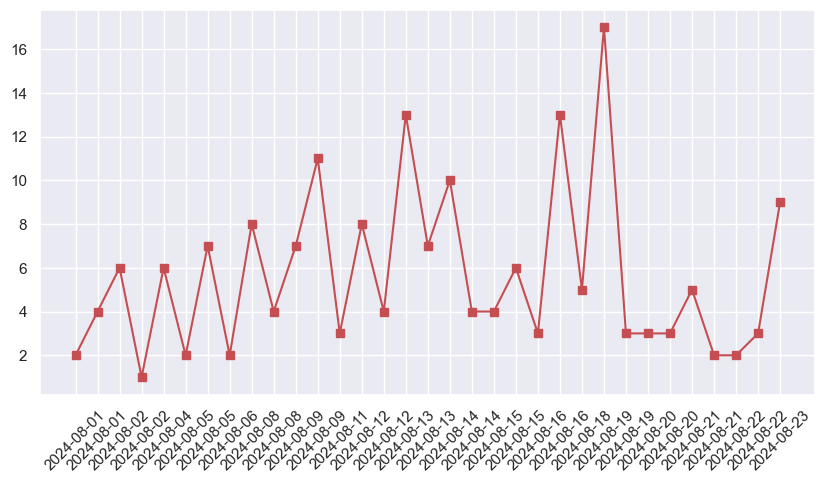

In [262]:
chart = all_his_df.loc[all_his_df.timeStr=='1', ('big_gift_user',)]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(chart, 'rs-')
ax.set_xticklabels(all_his_df.index,rotation=45)
plt.show()

,big_gift_user
dayStr,
2024-08-01,2
2024-08-02,4
2024-08-05,6
2024-08-06,1
2024-08-08,6
2024-08-09,2
2024-08-12,7
2024-08-13,2
2024-08-14,8


<Figure size 1200x400 with 0 Axes>

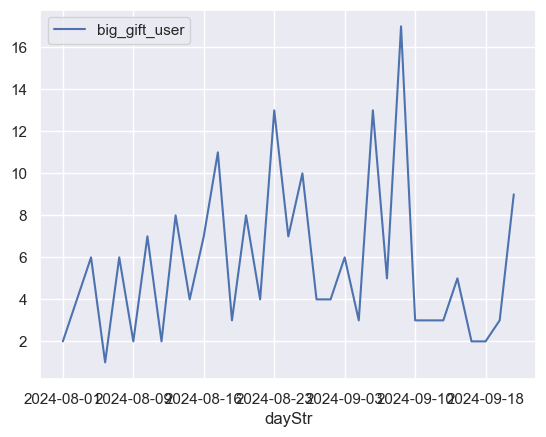

In [263]:
fig = plt.figure(figsize=(12,4))

chart.plot()
chart

In [77]:
dayStr = "2024-05-22"
timeStr = "2"



def get_giftuser_his(dayStr, timeStr, outfolder=outfolder):
    dfname = f"{outfolder}/{dayStr}_{timeStr}_gifts.pkl"
    giftdf = pd.read_pickle(dfname)

    giftuser = giftdf.groupby('displayId').agg({
        'nickName':'first', 
        'giftD':'sum',   
        'displayId':'last',
        'badge': 'first',
        'userLevel':'first',
        })
    giftuser.loc[:, 'dayStr'] = dayStr
    giftuser.loc[:, 'timeStr'] = timeStr
    return giftuser

def get_gift_dtl(dayStr, timeStr, outfolder=outfolder):
    dfname = f"{outfolder}/{dayStr}_{timeStr}_gifts.pkl"
    giftdf = pd.read_pickle(dfname)
    giftdf.loc[:, 'dayStr'] = dayStr
    giftdf.loc[:, 'timeStr'] = timeStr
    return giftdf
    
dayStrList = create_day_range("2024-09-01", "2024-10-01")

gift_his_df = pd.DataFrame()
no_gift_day = 0
for dd in dayStrList:
    for t in ["1", "2"]:
        try:
            df = get_gift_dtl(dd, t, outfolder=outfolder)
            # df = get_giftuser_his(dd, t, outfolder=outfolder)
            # print(df.shape)
            no_gift_day += 1
        except Exception as e:
            # print(e)   
            continue
        gift_his_df = pd.concat([gift_his_df, df], ignore_index=True)
gift_his_df.shape, no_gift_day

((97934, 15), 33)

In [265]:
gift_his_df.tail()

,userID,nickName,displayId,userLevel,badge,userFollowing,userFollower,giftName,giftD,sendType,clientGiftSource,time,timeStr,tr,dayStr
162888,517234456010220,啼云,51077677870,21,10,4,3,送出小心心,1,4,1,1725898023523,1,2024-09-10 00:07:04,2024-09-09
162889,1695871689818115,钰見葵宝💙¹⁵⁷,96307670703,27,12,5,82,送出进阶灯牌,8,5,1,1725898025316,1,2024-09-10 00:07:06,2024-09-09
162890,517234456010220,啼云,51077677870,21,10,4,3,送出小心心,1,4,1,1725898023523,1,2024-09-10 00:07:07,2024-09-09
162891,517234456010220,啼云,51077677870,21,10,4,3,送出小心心,1,4,1,1725898031770,1,2024-09-10 00:07:12,2024-09-09
162892,517234456010220,啼云,51077677870,21,10,4,3,送出小心心,1,4,1,1725898031770,1,2024-09-10 00:07:15,2024-09-09


In [71]:
gift_his_df[gift_his_df.displayId.str.contains('5201314chenna')].head()

#  'ydyxf12345'  老头 小号

,userID,nickName,displayId,userLevel,badge,userFollowing,userFollower,giftName,giftD,sendType,clientGiftSource,time,timeStr,tr,dayStr
19640,103056367869,乐逍瑶@❤️❤️💙💙💞💖,5201314chenna,48,13,348,756,送出人气票,1,4,1,1712759985440,2,2024-04-10 22:39:46,2024-04-10
19642,103056367869,乐逍瑶@❤️❤️💙💙💞💖,5201314chenna,48,13,348,756,送出人气票,1,4,1,1712759986079,2,2024-04-10 22:39:48,2024-04-10
19644,103056367869,乐逍瑶@❤️❤️💙💙💞💖,5201314chenna,48,13,348,756,送出人气票,1,4,1,1712759986859,2,2024-04-10 22:39:49,2024-04-10
19648,103056367869,乐逍瑶@❤️❤️💙💙💞💖,5201314chenna,48,13,348,756,送出人气票,1,4,1,1712759986859,2,2024-04-10 22:39:51,2024-04-10
29733,103056367869,乐逍瑶@❤️❤️💙💙💞💖,5201314chenna,48,13,353,757,送出人气票,1,4,1,1713261336883,1,2024-04-16 17:55:37,2024-04-16


In [78]:
gift_his_df.loc[:,'noon'] = np.where(gift_his_df.timeStr=='1',1, 0)
gift_his_df.loc[:,'nt'] = np.where(gift_his_df.timeStr=='2',1, 0)
gift_his_df.loc[:,'month'] = gift_his_df.dayStr.str[5:7]

In [288]:
def diamond_adjust(giftName):
    diamond = {
        '送出钻石火箭': 12000,
        '送出钻石邮轮': 7200,
        '送出钻石飞机': 3600,
        '送出钻石跑车': 1500,
        '送出钻石兔兔': 360,
        
    }
    return diamond.get(giftName)

In [72]:
zz = "dyhqzdhqxgru"
zzgift = gift_his_df[(gift_his_df.displayId==zz) & (gift_his_df.userLevel==47) & (gift_his_df.giftName.str.contains('钻'))]
zzgift.loc[:, 'giftD'] = zzgift.giftName.apply(diamond_adjust)
zzgift

/var/folders/9x/203dlgjj1l7d1y0l8gpsm65r0000gn/T/ipykernel_75815/3803087639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zzgift.loc[:, 'giftD'] = zzgift.giftName.apply(diamond_adjust)


,userID,nickName,displayId,userLevel,badge,userFollowing,userFollower,giftName,giftD,sendType,clientGiftSource,time,timeStr,tr,dayStr
239152,2651667330502132,老頭,dyhqzdhqxgru,47,14,10,159,送出钻石邮轮,7200,1,1,1721230909365,2,2024-07-17 23:41:50,2024-07-17
239166,2651667330502132,老頭,dyhqzdhqxgru,47,14,10,159,送出钻石邮轮,7200,1,1,1721231137614,2,2024-07-17 23:45:38,2024-07-17


In [291]:
zzgift.giftD.sum() + gift_his_df[(gift_his_df.displayId==zz) & (gift_his_df.userLevel==47) & (~gift_his_df.giftName.str.contains('钻'))].giftD.sum()

312334

In [79]:
gift_his_df_ss2 = gift_his_df.groupby(['displayId', 'month','dayStr']).agg({
    'nickName':'last',
    'giftD':'sum',
    # 'timeStr':'count',
    # 'displayId':'last'
}).reset_index()
gift_his_df_ss2 = gift_his_df_ss2[gift_his_df_ss2.giftD >= 1000]
gift_his_df_ss2

,displayId,month,dayStr,nickName,giftD
793,1201233930,09,2024-09-06,の、伱是涐的心劫,2627
794,1201233930,09,2024-09-11,肉肉灰,1743
795,1201233930,09,2024-09-12,肉肉灰,7842
796,1201233930,09,2024-09-13,肉肉灰,2922
1537,1489140375,09,2024-09-09,护瑶周全💚💙¹⁵⁷,18892
1538,1489140375,09,2024-09-10,神秘人785477,2405
1540,1489140375,09,2024-09-12,护瑶周全💚💙¹⁵⁷,2902
1564,1497420233,09,2024-09-25,Hope for the best,2201
2125,1694289720,09,2024-09-03,吉银道具,2272
2126,1694289720,09,2024-09-05,吉银道具,5244


In [80]:
for (dayStr ), rows, in  gift_his_df_ss2.groupby(['dayStr']):
    print(dayStr, ": ", rows.shape[0])
    print(rows.groupby('nickName').giftD.sum())
    print()
    # print(dayStr,displayId, rows.iloc[-1].nickName, rows.giftD.sum())

2024-09-02 :  3
nickName
Zaza哥哥 一直在…         12716
乐乐瑶瑶💙 ¹⁵⁷（是偏爱💞💓）     2232
💤💤💤                 10976
Name: giftD, dtype: int64

2024-09-03 :  3
nickName
吉银道具         2272
神秘人151107    1238
神秘人741805    8955
Name: giftD, dtype: int64

2024-09-04 :  6
nickName
12乐瑶舞馆💙¹⁵⁷         1256
LᎭₑོ摆子局局长ꦿ᭄᪲࿐এ     1400
Zaza哥哥 一直在…        5282
乐瑶💙¹⁵              1200
老阿叔               13907
💤💤💤               17862
Name: giftD, dtype: int64

2024-09-05 :  15
nickName
0324💙💚 ¹⁵⁷      4054
@薄荷撞可乐？         2275
Zaza哥哥 一直在…     6647
乐瑶💙¹⁵          10917
十二💚💙¹⁵⁷         1920
十在             11957
吉银道具            5244
夕夕💙¹⁵⁷          1576
小通学英语           1049
粉凤凰💙157         2202
老阿叔            33897
芝士🧀宝宝           1298
随疯              1259
👑 Queen 👑       1287
💤💤💤             5332
Name: giftD, dtype: int64

2024-09-06 :  10
nickName
0324💙💚 ¹⁵⁷     2653
@薄荷撞可乐？        1224
Zaza哥哥 一直在…    3224
の、伱是涐的心劫       2627
十二💚💙¹⁵⁷        1408
吉银道具           1725
夕夕💙¹⁵⁷         2026
老阿叔            3936
🐉💫明悅無悔✨💫👫🐉    

/var/folders/9x/203dlgjj1l7d1y0l8gpsm65r0000gn/T/ipykernel_75815/2666413335.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (dayStr ), rows, in  gift_his_df_ss2.groupby(['dayStr']):


In [116]:
for month, rows in gift_his_df_ss2.groupby('month'):
    days = np.unique(rows.timeStr).shape[0]
    giftUser = np.unique(rows.displayId).shape[0]
    print(f" {month}:  days: {days}, giftUser: {giftUser},  {(giftUser/days):.0f} total {rows.giftD.sum()} , {(rows.giftD.sum()/days):.2f}")
    

 04:  days: 2, giftUser: 189,  94 total 877914 , 438957.00
 05:  days: 2, giftUser: 223,  112 total 945056 , 472528.00
 06:  days: 2, giftUser: 174,  87 total 607454 , 303727.00
 07:  days: 2, giftUser: 321,  160 total 1272320 , 636160.00
 08:  days: 2, giftUser: 186,  93 total 577268 , 288634.00


In [117]:
u4 = list(np.unique(gift_his_df_ss2[gift_his_df_ss2.month=='04'].loc[:,'displayId']))
u5 = list(np.unique(gift_his_df_ss2[gift_his_df_ss2.month=='05'].loc[:,'displayId']))
u6 = list(np.unique(gift_his_df_ss2[gift_his_df_ss2.month=='06'].loc[:,'displayId']))
u7 = list(np.unique(gift_his_df_ss2[gift_his_df_ss2.month=='07'].loc[:,'displayId']))
u8 = list(np.unique(gift_his_df_ss2[gift_his_df_ss2.month=='08'].loc[:,'displayId']))


print(len(u5), len(u6), len(u7), len(u8))

223 174 321 186


In [28]:
# list(set(u7) -set(u6))

In [118]:
unique_u8 = gift_his_df_ss2[(gift_his_df_ss2.month=='08') 
                            # & (~gift_his_df_ss2.displayId.isin(u6))
                            # & (~gift_his_df_ss2.displayId.isin(u7))
                            
                            # & (gift_his_df_ss2.displayId.isin(u4))
                            ].drop_duplicates(subset='displayId', keep='last')
unique_u8.shape

(186, 5)

In [136]:
gift_his_df_ss2_2 = gift_his_df_ss2[
    # (gift_his_df_ss2.displayId.isin(unique_u8.displayId)) & 
    (gift_his_df_ss2.month=='08')  
                & (gift_his_df_ss2.giftD> 1000)].sort_values(['giftD'], ascending=[0])

gift_his_df_ss2_2.groupby(['displayId','timeStr']).agg({
    'displayId':'first',
    'nickName':'last',
    'giftD':['sum','count'],
    
})

displayId            nickName  giftD      
                                     first                last    sum count
displayId        timeStr                                                   
1201233930       1              1201233930           の、小灰灰[加一]   5320     1
                 2              1201233930           の、小灰灰[加一]  33640     1
13852667809wyj   1          13852667809wyj                昵称王二   1489     1
1646644989       2              1646644989     Flying Kites 风筝   1200     1
1687443075       2              1687443075           三种颜色💫¹²¹²   2260     1
1822799866       1              1822799866                剑胆琴心   2972     1
                 2              1822799866                剑胆琴心   2229     1
1874729113       1              1874729113               ♒晋♥宁♦   2696     1
                 2              1874729113               ♒晋♥宁♦   1039     1
1991794978       2              1991794978                什么都没   1160     1
2023a710156      1             2023a710156                  忍心   1386     1
24176584703      2             24176584703                静心自在   1506     1
27769706206      1             27769706206                不是表哥  19949     1
                 2             27769706206                不是表哥  30010     1
35615122310      1             35615122310                   :   1118     1
39410073839      1             39410073839               小通学英语   4557     1
                 2             39410073839               小通学英语   5470     1
47977472869      2             47977472869                乐在逍遥   3226     1
50656296786      1             50656296786           乐乐瑶瑶💙 ¹⁵⁷   6363     1
                 2             50656296786           乐乐瑶瑶💙 ¹⁵⁷  19233     1
513413149aini    2           513413149aini          🌈钰見琪迹💚💙¹⁵⁷   3339     1
5201314chenna    2           5201314chenna        乐逍瑶@❤️❤️💙💙💞💖   1089     1
56834566235      1             56834566235             拿低保的小老头   2195     1
                 2             56834566235             拿低保的小老头   1306     1
604765012        2               604765012                 丁伟平   1202     1
61340795132      1             61340795132                 💤💤💤  37898     1
                 2             61340795132                 💤💤💤  50602     1
70191191441      2             70191191441                一方净土   3447     1
70654242320      1             70654242320             粉凤凰💙157   4253     1
                 2             70654242320             粉凤凰💙157   4705     1
73247775356      1             73247775356     用户7437128777689   1200     1
                 2             73247775356     用户7437128777689   7065     1
78295976248      2             78295976248                  小蜂   1521     1
83005417913      1             83005417913    ⭐️⭐️⭐️《斌斌》⭐️⭐️⭐️   1616     1
                 2             83005417913    ⭐️⭐️⭐️《斌斌》⭐️⭐️⭐️   1439     1
92930226         1                92930226               水清则无鱼   2107     1
                 2                92930226               水清则无鱼  11529     1
939069093        2               939069093                   斌   2701     1
993257442        1               993257442               超超🎗🎗🎗   1999     1
                 2               993257442               超超🎗🎗🎗   2920     1
CY20220409_____  1         CY20220409_____              夕夕💙¹⁵⁷   1829     1
                 2         CY20220409_____              夕夕💙¹⁵⁷   4456     1
dyhqzdhqxgru     2            dyhqzdhqxgru                  老頭  76679     1
dyrrj6ci32a1     1            dyrrj6ci32a1         Zaza哥哥 一直在…  37205     1
                 2            dyrrj6ci32a1         Zaza哥哥 一直在…  66050     1
dyv84r1ge5ef     1            dyv84r1ge5ef                  随疯   4236     1
                 2            dyv84r1ge5ef                  随疯  16845     1
kuiconniee       1              kuiconniee               葵之泪💚💙   1485     1
                 2              kuiconniee               葵之泪💚💙   2279     1
kuidabusi        2               kuidabusi           葵宝L·💚💙¹⁵⁷   1015     1
ma545

In [121]:
# gift_his_df_ss2_2

In [135]:
gift_his_df_ss2_2.loc[gift_his_df_ss2_2.timeStr =='1', ['giftD'] ].count() / gift_his_df_ss2_2.giftD.count()
# gift_his_df_ss2_2[gift_his_df_ss2_2.timeStr < 20 ].shape[0] / gift_his_df_ss2_2.shape[0]

giftD    0.4
dtype: float64

In [478]:
# gift_his_df[gift_his_df.nickName.str.contains('差一步') ]
gift_his_df[gift_his_df.displayId.str.contains('46325') ]
# .groupby('nickName').agg({'giftD':'sum'})

,userID,nickName,displayId,userLevel,badge,userFollowing,userFollower,giftName,giftD,sendType,clientGiftSource,time,timeStr,tr,dayStr


member with gift > 99

In [50]:
mm_g = member_his_df[member_his_df.displayId.isin(u6)]
mm_g.shape

(704, 8)

In [54]:
mm_g.tail(), mm_g.dtypes

(           nickName       displayId  userID  badge  userLevel  \
 16427         葵之泪💚💙      kuiconniee       3     17         38   
 16428     葵宝L·💚💙¹⁵⁷       kuidabusi      19     16         32   
 16432         乐韵舞蹈💙      leyunleyao       3     12         25   
 16453  差一天 乐瑶舞馆💙¹⁵⁷       ojbvqxjxe       2     16         37   
 16548          用户随意  yonghusuiyi566       3     10         20   
 
                        tr  hrs  mins  
 16427 2024-06-27 16:04:07   16     4  
 16428 2024-06-27 16:01:59   16     1  
 16432 2024-06-27 16:32:57   16    32  
 16453 2024-06-27 17:05:36   17     5  
 16548 2024-06-27 16:50:29   16    50  ,
 nickName             object
 displayId            object
 userID                int64
 badge                 int64
 userLevel             int64
 tr           datetime64[ns]
 hrs                   int64
 mins                  int64
 dtype: object)

In [317]:
gift_his_df[gift_his_df.displayId=='28060882913']
# gift_his_df[gift_his_df.nickName.str.contains('糖')]

,userID,nickName,displayId,userLevel,badge,userFollowing,userFollower,giftName,giftD,sendType,clientGiftSource,time,timeStr,tr,dayStr
1426,3769591584273456,💧💧💧,28060882913,0,0,0,0,送出入团卡,1,None,1,None,2,2024-06-02 22:42:54,2024-06-02
1427,3769591584273456,💧💧💧,28060882913,0,0,0,0,送出入团卡,1,None,1,None,2,2024-06-02 22:42:57,2024-06-02
1428,3769591584273456,💧💧💧,28060882913,1,1,1,0,送出粉丝团灯牌,1,1,1,1717339427850,2,2024-06-02 22:43:49,2024-06-02
1436,3769591584273456,💧💧💧,28060882913,1,1,1,0,送出为你闪耀,9,None,1,1717339569647,2,2024-06-02 22:46:11,2024-06-02
1437,3769591584273456,💧💧💧,28060882913,1,1,1,0,送出为你闪耀,9,None,1,1717339569647,2,2024-06-02 22:46:13,2024-06-02
1455,3769591584273456,💧💧💧,28060882913,2,1,1,0,送出Thuglife,99,1,1,1717339856126,2,2024-06-02 22:50:57,2024-06-02
1465,3769591584273456,💧💧💧,28060882913,7,2,1,0,送出Thuglife,99,5,1,1717339940707,2,2024-06-02 22:52:22,2024-06-02
1506,3769591584273456,💧💧💧,28060882913,9,2,1,0,送出Thuglife,99,5,1,1717340268382,2,2024-06-02 22:57:49,2024-06-02
1513,3769591584273456,💧💧💧,28060882913,10,3,1,0,送出Thuglife,99,5,1,1717340301074,2,2024-06-02 22:58:22,2024-06-02
1514,3769591584273456,💧💧💧,28060882913,11,3,1,0,送出Thuglife,99,5,1,1717340302682,2,2024-06-02 22:58:24,2024-06-02


In [65]:
# for displayId, rows in mm_g.groupby('nickName'):
#     print(rows.iloc[-1].nickName)
#     ssx =  rows.groupby('hrs').agg({'displayId':'count'})
#     print(ssx)
#     print()
mm_g.groupby(['hrs','displayId']).agg({
    'nickName':'last',
    'mins':'count',
})

nickName  mins
hrs displayId                     
15  12345chws     🌈陈年往事，往事随风     1
    1489140375         王胖子..     1
    157936274             柠萌     3
    170171991           阳光宅男     3
    1773963546          隐身守候     1
...                      ...   ...
23  dujun1642          影 子 说     1
    dycdkljow6ls        伟伟代办     2
    hwh344839638    hwh$¥736     1
    longteng7920      628💥龙腾     1
    ma545910871        枸杞哥哥！     1

[307 rows x 2 columns]

In [ ]:
# dayStr = "2024-06-02"
# timeStr = "2"
# giftdf = pd.read_pickle(f"{outfolder}/{dayStr}_{timeStr}_gifts.pkl")
# giftdf.tail()

In [87]:
gift_his_df_summary = gift_his_df.groupby(['displayId']).agg({
    'dayStr':'count', 
    'nickName':'last',
    'badge': 'last',
    'displayId':'first',
    'userLevel':'last',
    'giftD':'sum',
})
gift_his_df_summary

,dayStr,nickName,badge,displayId,userLevel,giftD
displayId,,,,,,
,5,浪***,0,,18,18
0....000_,1,……:.....,0,0....000_,19,2
0.0123210.0,1,菜刀,0,0.0123210.0,22,1
000....5r.xf....,1,jllgdssthdh,0,000....5r.xf....,15,2
000123000com,1,用户1687095,0,000123000com,24,2
...,...,...,...,...,...,...
zzl20201014,1,心🈶所系,2,zzl20201014,24,10
zzp65107311,3,松竹梅蘭,3,zzp65107311,17,43
zzqjkrn,1,米粒,0,zzqjkrn,20,2


In [88]:
toDevUser = gift_his_df_summary[(gift_his_df_summary.dayStr < 5) & (gift_his_df_summary.giftD > 300 )].sort_values(['giftD'], ascending=[0])

In [89]:
# toDevUser.to_excel("todev.xlsx")
toDevUser

,dayStr,nickName,badge,displayId,userLevel,giftD
displayId,,,,,,
laoxiaohua16,4,劳骁骅,0,laoxiaohua16,37,36499
97642949975,1,杨朗,4,97642949975,34,6091
l47468,3,🐉💫明悅無心✨💫👫🐉,10,l47468,34,4380
993257442,4,超超🎗🎗🎗,55,993257442,0,4380
Lt279158,1,Tiger.,10,Lt279158,62,3519
WY13266,1,王半仙儿,0,WY13266,33,2790
min76815,3,悠然自在,0,min76815,43,2728
dylk51ss29z3,3,東東（2）,11,dylk51ss29z3,39,1626
1088100518jl,2,嘎,47,1088100518jl,0,1211


## member vs last month gift user

In [90]:
# member_df.tail()
today_member_in_lastm = gift_his_df_summary[(gift_his_df_summary.displayId.isin(member_df.displayId) )& (gift_his_df_summary.giftD > 2)].shape[0]
old_user_rate = round(today_member_in_lastm / gift_his_df_summary[gift_his_df_summary.giftD > 3].shape[0], 2)
print(f" today user in last month gift user: {today_member_in_lastm}, last month giftuser  > 3: {gift_his_df_summary[gift_his_df_summary.giftD > 2].shape[0]}, old user rate: {old_user_rate}")

 today user in last month gift user: 1100, last month giftuser  > 3: 6962, old user rate: 0.17


array([[<Axes: title={'center': 'dayStr'}>,
        <Axes: title={'center': 'badge'}>],
       [<Axes: title={'center': 'userLevel'}>,
        <Axes: title={'center': 'giftD'}>]], dtype=object)

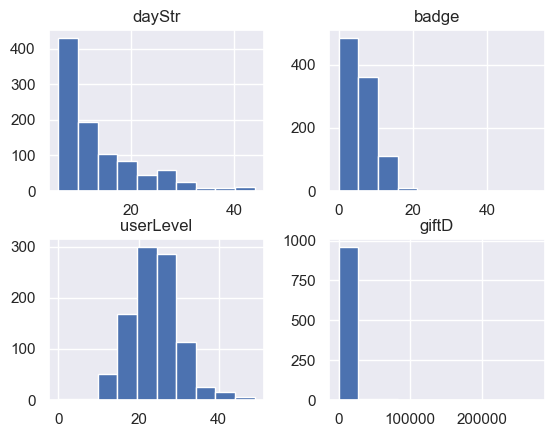

In [92]:
gift_his_df_summary[gift_his_df_summary.dayStr > 5].hist()

In [91]:
for (nickName, rows) in gift_his_df[gift_his_df.giftD>1000].groupby('nickName'):
    print()
    print(nickName)
    afternoon = rows[rows.timeStr=='1'].shape[0]
    night = rows[rows.timeStr=='2'].shape[0]
    print(f"下午 {afternoon}   晚上 {night}")
    print(f"total {rows.giftD.sum()}, 平均: {rows.giftD.mean():.0f}")
    print("----")


@一颗不变心
下午 1   晚上 0
total 1128, 平均: 1128
----

Tiger.
下午 0   晚上 1
total 3519, 平均: 3519
----

Zaza哥哥
下午 3   晚上 4
total 35018, 平均: 5003
----

Zaza哥哥 @157
下午 2   晚上 5
total 46930, 平均: 6704
----

Zaza哥哥 一直在…
下午 10   晚上 13
total 109023, 平均: 4740
----

一方净土
下午 0   晚上 1
total 1007, 平均: 1007
----

一路上有係陪伴
下午 0   晚上 1
total 1315, 平均: 1315
----

三种颜色
下午 0   晚上 4
total 6182, 平均: 1546
----

不是表哥
下午 5   晚上 15
total 37804, 平均: 1890
----

与世无争
下午 0   晚上 1
total 1464, 平均: 1464
----

乐乐瑶瑶💙 ¹⁵⁷
下午 2   晚上 18
total 48264, 平均: 2413
----

乐瑶💙¹⁵⁷
下午 1   晚上 0
total 1087, 平均: 1087
----

乐逍瑶@❤️❤️💙💙💞💖
下午 1   晚上 1
total 3407, 平均: 1704
----

劳骁骅
下午 0   晚上 3
total 36497, 平均: 12166
----

君霖
下午 0   晚上 1
total 1092, 平均: 1092
----

嘎嘎😊 （白嫖团）
下午 0   晚上 1
total 1200, 平均: 1200
----

夕夕💙¹⁵⁷
下午 1   晚上 3
total 8341, 平均: 2085
----

大国
下午 0   晚上 1
total 2589, 平均: 2589
----

天境⚡云生（白嫖团）
下午 0   晚上 3
total 5339, 平均: 1780
----

小5♏️
下午 0   晚上 1
total 1210, 平均: 1210
----

小宝
下午 1   晚上 0
total 1206, 平均: 1206
----

差一天 乐瑶舞馆💙¹⁵⁷
下午 1  

In [93]:
gift_summary = gift_his_df.groupby('displayId').agg({'nickName':'last', 'giftD':'sum', 'dayStr': 'count'})
gift_summary

,nickName,giftD,dayStr
displayId,,,
,浪***,18,5
0....000_,……:.....,2,1
0.0123210.0,菜刀,1,1
000....5r.xf....,jllgdssthdh,2,1
000123000com,用户1687095,2,1
...,...,...,...
zzl20201014,心🈶所系,10,1
zzp65107311,松竹梅蘭,43,3
zzqjkrn,米粒,2,1


In [94]:
top8 = gift_summary[(gift_summary.dayStr >= 1) & (gift_summary.giftD > 2000)].sort_values(['giftD'], ascending=[0])

/Users/jianghongjiang/.virtualenvs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32769 (\N{CJK UNIFIED IDEOGRAPH-8001}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jianghongjiang/.virtualenvs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38957 (\N{CJK UNIFIED IDEOGRAPH-982D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jianghongjiang/.virtualenvs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21733 (\N{CJK UNIFIED IDEOGRAPH-54E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jianghongjiang/.virtualenvs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jianghongjiang/.virtualenvs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.

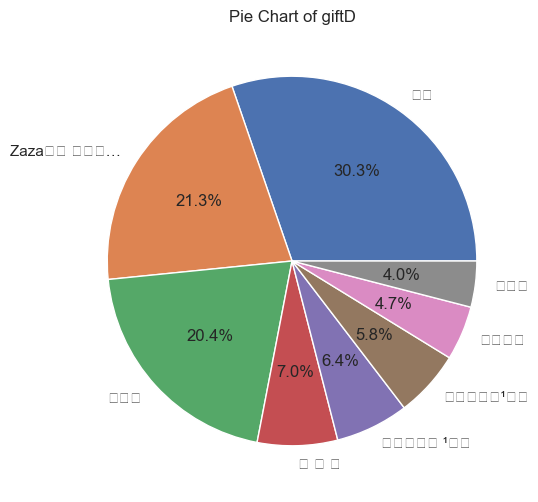

In [95]:
top8 = top8.loc[:, ('nickName','giftD')][:8]
# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(top8['giftD'], labels=top8['nickName'], autopct='%1.1f%%')

# Add title and labels
plt.title('Pie Chart of giftD')
# plt.legend()

# Show the plot
plt.show()


In [ ]:
giftss = gift_summary[(gift_summary.dayStr >=1) & (gift_summary.giftD > 100)]
giftss.loc[:,'avg'] = np.round(giftss.giftD / giftss.dayStr, 0)
giftss = giftss.sort_values(['dayStr'], ascending=[0])
# giftss.to_csv("4-5gifts.csv")
giftss,giftss.shape


In [ ]:
giftss.tail()

# member history

In [5]:
def get_member_user_his(dayStr, timeStr, outfolder=outfolder):
    dfname = f"{outfolder}/{dayStr}_{timeStr}_member.pkl"
    member_df = pd.read_pickle(dfname)
    # member_user = member_df
    # member_df = member_df.drop_duplicates(subset='nickName', keep='first')
    member_df['ts_int'] = member_df.timeStr.apply(lambda x: int(x[11:14].replace(":","")))
    member_user = member_df.groupby('displayId').agg({
        'nickName':'first', 
        'userID':'count',   
        'displayId':'last',
        'badge': 'last',
        'userLevel':'last',
        'ts_int':'first'
        })
    member_user.loc[:, 'dayStr'] = dayStr
    member_user.loc[:, 'timeStr'] = timeStr
    return member_user

dayStrList = create_day_range("2024-07-01", "2024-08-19")

member_his_df = pd.DataFrame()
print(dayStrList)
for dd in dayStrList:
    for t in ["1", "2"]:
        try:
            df = get_member_user_his(dd, t, outfolder=outfolder)
            # print(df.shape)
        except Exception as e:
            # print(e)   
            continue
        member_his_df = pd.concat([member_his_df, df], ignore_index=True)
member_his_df.shape

['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12', '2024-07-13', '2024-07-14', '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18', '2024-07-19', '2024-07-20', '2024-07-21', '2024-07-22', '2024-07-23', '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28', '2024-07-29', '2024-07-30', '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11', '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16', '2024-08-17', '2024-08-18', '2024-08-19']


(412780, 8)

In [6]:
member_his_df.tail()

,nickName,userID,displayId,badge,userLevel,ts_int,dayStr,timeStr
412775,亿达实业,2,zyyg59888888,0,23,21,2024-08-16,2
412776,1314520,1,zyyycx,0,26,21,2024-08-16,2
412777,米粒,1,zzqjkrn,0,21,22,2024-08-16,2
412778,佛佑,2,zzx556607788,0,18,21,2024-08-16,2
412779,striking,1,zzxlove0806,0,1,21,2024-08-16,2


In [7]:
member_his_df['high_level'] =  np.where(member_his_df.userLevel >33, 1, 0)
member_his_df['low_level'] =  np.where(member_his_df.userLevel  >33, 0, 1)
mm_summary= member_his_df[member_his_df.ts_int > 19].groupby(['dayStr', 'timeStr', 'ts_int']).agg({
    'displayId':'count',
    'high_level':'sum',
    'low_level':'sum',
})

mm_summary['high_rate'] = np.round(mm_summary.high_level * 100/ mm_summary.low_level, 1)
mm_summary

displayId  high_level  low_level  high_rate
dayStr     timeStr ts_int                                             
2024-07-01 2       20           2421          65       2356        2.8
                   21           1230          35       1195        2.9
                   22            869          25        844        3.0
                   23            407          15        392        3.8
2024-07-02 2       20           2238          92       2146        4.3
                   21           1668          56       1612        3.5
                   22            820          30        790        3.8
                   23            258           9        249        3.6
2024-07-03 2       20           2058          63       1995        3.2
                   21           1860          45       1815        2.5
                   22           2172          56       2116        2.6
                   23            214          10        204        4.9
2024-07-04 2       20           2247          83       2164        3.8
                   21           1540          53       1487        3.6
                   22            332           9        323        2.8
                   23            308          13        295        4.4
2024-07-05 2       20            475          11        464        2.4
                   21           1649          34       1615        2.1
                   22           2324         210       2114        9.9
                   23            324          11        313        3.5
2024-07-07 2       20           1183          33       1150        2.9
                   21           3586         103       3483        3.0
                   22           1756          41       1715        2.4
                   23            343          10        333        3.0
2024-07-08 2       20           1329          73       1256        5.8
                   21           2908         100       2808        3.6
                   22           1207          23       1184        1.9
                   23            472          21        451        4.7
2024-07-09 2       20            179          11        168        6.5
                   21           4201         158       4043        3.9
                   22           1004          26        978        2.7
                   23            563          27        536        5.0
2024-07-10 2       20           2275         111       2164        5.1
                   21           2441          47       2394        2.0
                   22            898          34        864        3.9
                   23            341          19        322        5.9
2024-07-11 2       20           2255         125       2130        5.9
                   21           5579         296       5283        5.6
                   22           1127          43       1084        4.0
                   23            736          18        718        2.5
2024-07-14 2       20           3875         223       3652        6.1
                   21           3588         116       3472        3.3
                   22            703          32        671        4.8
                   23            314          11        303        3.6
2024-07-15 2       20           1444          48       1396        3.4
                   21           1221          44       1177        3.7
                   22             28           0         28        0.0
                   23            277          15        262        5.7
2024-07-16 2       20            861          36        825        4.4
                   21            951          36        915        3.9
                   22            792          42        750        5.6
                   23            535          24        511        4.7
2024-07-17 2       20           1182          54       1128        4.8
                   21            862          33        829        4.0
                   22            849          24   

In [8]:
unique_member = member_his_df.drop_duplicates(subset='displayId')
unique_member[unique_member.userID > 1].groupby('timeStr').count()


,nickName,userID,displayId,badge,userLevel,ts_int,dayStr,high_level,low_level
timeStr,,,,,,,,,
1,8402,8402,8402,8402,8402,8402,8402,8402,8402
2,10509,10509,10509,10509,10509,10509,10509,10509,10509


In [9]:
member_in_history = member_df[member_df.displayId.isin(unique_member[unique_member.userID > 1].displayId)]
old_user_member_rate = round(member_in_history.shape[0] / member_df.shape[0], 2)
print(f"today user in last member history: {member_in_history.shape[0]}, old_user_member_rate: {old_user_member_rate}")

NameError: name 'member_df' is not defined

In [146]:
member_his_df[member_his_df.displayId.str.contains("dyhqzdhqxgru")]
# member_his_df[member_his_df.nickName.str.contains("戒烟")]


,nickName,displayId,userID,badge,userLevel,tr,hrs,mins
1463,老頭,dyhqzdhqxgru,2,16,48,2024-08-21 23:21:20,23,21
2168,老頭,dyhqzdhqxgru,2,16,48,2024-08-22 16:37:07,16,37
2853,老頭,dyhqzdhqxgru,3,16,48,2024-08-22 22:27:25,22,27
4494,老頭,dyhqzdhqxgru,3,16,48,2024-08-25 22:54:15,22,54
6274,老頭,dyhqzdhqxgru,4,16,48,2024-08-26 23:16:02,23,16
7600,乐瑶💙¹⁵,dyhqzdhqxgru,6,16,48,2024-08-27 21:18:05,21,18
10098,神秘人578767,dyhqzdhqxgru,5,0,0,2024-08-29 22:27:03,22,27
11381,乐瑶💙¹⁵,dyhqzdhqxgru,2,16,48,2024-08-30 22:49:23,22,49
12705,神秘人151107,dyhqzdhqxgru,2,0,0,2024-09-03 17:06:26,17,6


In [141]:
# pd.concat([member_in_history, unique_member], left_on='displayId', right_on='displayId', rsuffix='_u_')
unique_member

,nickName,userID,displayId,badge,userLevel,dayStr,timeStr
0,00000:邘郭可学,1,00000yuguoke,0,18,2024-07-01,2
1,(奇),1,0167153030vivi,0,18,2024-07-01,2
2,"1,2,3↗",1,0668yyy,0,12,2024-07-01,2
3,🦋҉ིꦿ柒月🦋҉ིꦿ💕,1,0717Liy,0,14,2024-07-01,2
4,马大帅,1,1000021332,0,23,2024-07-01,2
...,...,...,...,...,...,...,...
59508,昨天已过,1,zuotianyeguo33,0,23,2024-07-08,2
59510,鋼鉄侠,1,zw20210220,0,24,2024-07-08,2
59511,懂你快乐,1,zxc98765410,0,19,2024-07-08,2
59512,💞小阿秀🥀,1,zybzzjhsldtc3,0,7,2024-07-08,2


# compare room user to history

fdayStr 2024-09-14, 2024-09-14
fdayStr 2024-09-12, 2024-09-12
today 179.30643776824036, max 508 场观 6875, 
yesterday 315.8152173913044, max 3206, 场观: 17096


(1.4458333333333333, 1.5116666666666667)

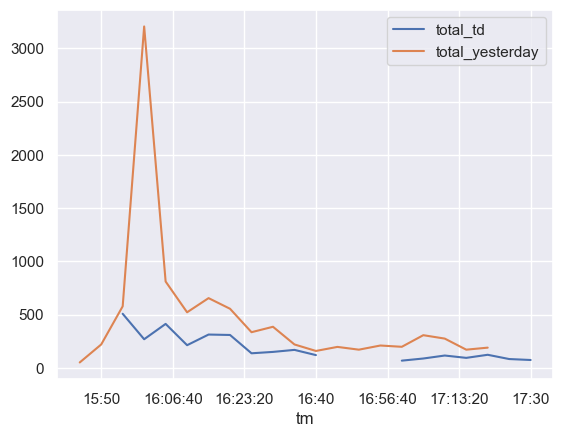

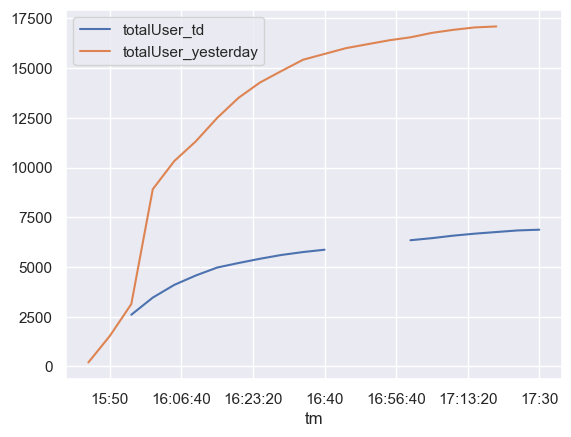

In [192]:
def read_rmuser_df(fname_rmuser):
    rmuser_df = pd.read_pickle(fname_rmuser)
    ff = fname_rmuser.split("/")[-1]
    fdayStr = ff[:10]
    print(f'fdayStr {fdayStr}, {dt.datetime.strptime(fdayStr, "%Y-%m-%d").date()}')
    rmuser_df.loc[:, 'tr'] = rmuser_df.timeStr.apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S" ))
    rmuser_df = rmuser_df[rmuser_df.timeStr.str[:10]==fdayStr]
    rmuser_df.loc[:, 'total'] = rmuser_df.total.astype(int)
    rmuser_df.loc[:, 'totalUser'] = rmuser_df.totalUser.astype(int)
    rmuser_df = rmuser_df.set_index('tr')
    return rmuser_df

rmuser_df = read_rmuser_df(f"{outfolder}/2024-09-14_1_rmuser.pkl")

last_rmdf = read_rmuser_df(f"{outfolder}/2024-09-12_1_rmuser.pkl")
rmuser_df_summary = rmuser_df.resample('5min').agg({'total': 'max','totalUser':'last'})
rmuser_df_summary['tm'] = rmuser_df_summary.index
rmuser_df_summary['tm'] = rmuser_df_summary.tm.apply(lambda x: x.time())
rmuser_df_summary = rmuser_df_summary.set_index('tm')

# rmuser_df_summary['tm'] = rmuser_df_summary.tm.time
last_rmdf_summary = last_rmdf.resample('5min').agg({'total': 'max', 'totalUser':'last'})
last_rmdf_summary['tm'] = last_rmdf_summary.index
last_rmdf_summary['tm'] = last_rmdf_summary.tm.apply(lambda x: x.time())
last_rmdf_summary = last_rmdf_summary.set_index('tm')

combined = rmuser_df_summary.merge(last_rmdf_summary, how='outer',left_index = True, right_index=True, suffixes=['_td','_yesterday'])
# combined = combined.dropna()

combined_total = combined.loc[:, ('total_td', 'total_yesterday')]
combined_TU = combined.loc[:, ('totalUser_td', 'totalUser_yesterday')]


# fix, (ax1, ax2) = plt.subplots(2,1)
# ax1.plot(rmuser_df_summary)
# ax2.plot(last_rmdf_summary)
combined_total.plot()
combined_TU.plot()
# rmuser_df_summary.tail()
print(f"today {rmuser_df.total.mean()}, max {rmuser_df.total.max()} 场观 {rmuser_df.totalUser.max()}, \nyesterday {last_rmdf.total.mean()}, max {last_rmdf.total.max()}, 场观: {last_rmdf.totalUser.max()}")
rmss1 = rmuser_df[rmuser_df.total >=100]
rmss0 = last_rmdf[last_rmdf.total >=100]

(rmss1.index[-1]- rmss1.index[0]).total_seconds() / 3600, (rmss0.index[-1]- rmss0.index[0]).total_seconds() / 3600

In [105]:
combined.head(30)

,total_td,totalUser_td,total_yestday,totalUser_yestday
tm,,,,
15:30:00,6.666667,7.0,NaN,NaN
15:33:00,21.775510,112.0,NaN,NaN
15:36:00,74.419355,558.0,NaN,NaN
15:39:00,165.094595,1364.0,NaN,NaN
15:42:00,308.075000,2102.0,NaN,NaN
15:45:00,320.446154,2566.0,NaN,NaN
15:48:00,301.031250,2946.0,NaN,NaN
15:51:00,383.772152,3441.0,NaN,NaN
15:54:00,333.802817,3842.0,NaN,NaN


In [ ]:
rmss = rmuser_df_2[rmuser_df_2.total >=100]
(rmss.index[-1]- rmss.index[0]).total_seconds() / 3600

In [ ]:
# like_sum = like_df.groupby('user').sum()

# like_sum.sort_values(['cc'], ascending=[0]).head(30)
# gifts_df
combined.tail()

In [ ]:
member_df.tail()

In [ ]:
gifts_df.loc[:, 'tr'] = gifts_df.timeStr.apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S" ))
print(f"total gift {gifts_df.giftD.sum()}")
gifts_df.groupby(['giftName']).agg({'giftD':'sum', 'timeStr':'count'})

In [ ]:
gift_by_user = gifts_df.groupby(['nickName']).agg({'giftD':'sum', 'timeStr':'count'})
print(f"total : {gift_by_user.giftD.sum()}")
gift_by_user.sort_values(['giftD'], ascending=[0])

In [ ]:
gift_by_user.loc[gift_by_user.giftD < 100, 'giftD'].sum()

In [ ]:
# gift data

def read_gift_data(fname):
    gifts_df = pd.read_pickle(f"{outfolder}/{fname}_gifts.pkl")
    gifts_df.loc[:, 'tr'] = gifts_df.timeStr.apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S" ))
    gifts_df = gifts_df.set_index('tr')
    return gifts_df

gift_fn = '2024-05-24_1'
gifts_df2 = read_gift_data(gift_fn)

In [ ]:
gifts_df2.tail()

In [ ]:
gifts_df2 = gifts_df.set_index('tr')
gift_by_time = gifts_df2[gifts_df2.giftD<10000].resample('5min').agg({'giftD':'sum'})

gift_by_time.plot()

分析礼物


In [ ]:
gcut = pd.cut(gift_by_user.giftD, bins=[0, 1, 5,10, 100, 300, 600,50000])
gift_by_user.groupby(gcut).agg({'giftD':'sum', 'timeStr':'count'})

In [ ]:
chats_df = pd.read_pickle(f"{outfolder}/2024-05-10_2_chats.pkl")
chats_df.tail()

In [ ]:
# chats_df[chats_df.nickName.str.contains('平安')]
chats_df[1707:1720]

In [ ]:
def process_memberdf(member_df):
    member_df.loc[:,'ts'] = member_df.timeStr.apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S" ))
    member_df = member_df[~pd.isnull(member_df.memberCount)]
    member_df.loc[:,'memberCount'] = member_df.loc[:,'memberCount'].astype(int)
    member_df2 =  member_df.set_index('ts')
    member_data = member_df2[~pd.isnull(member_df2.memberCount)].resample('5min').agg({'nickName':'count', 'memberCount': ['min', 'max','mean']}).dropna()
    return member_df2, member_data


In [ ]:
# member_df[pd.isnull(member_df.displayId)]
# member_df2.resample('1Min').agg({'memberCount':'mean'}).plot()
member_df2, member_data = process_memberdf(member_df)
member_data.plot()

In [ ]:
member_df.tail()

In [ ]:
member_user_visit = member_df.groupby('nickName').agg({'displayId':'last','timeStr':'count'})
member_user_visit[member_user_visit.timeStr>=1]

In [ ]:
member_df.loc[:,'memberCount'] = member_df.memberCount.dropna().astype(int) 
member_df.memberCount.max()

In [ ]:
rmuser_df.total.max()

In [ ]:
import matplotlib.pyplot as plt

member_data.columns = [''.join(col).strip() for col in member_data.columns.values]
member_data.columns =['New','Min','Max', 'Mean']
member_data = member_data.dropna()
keeps =member_data.Mean / member_data.loc[:,'New'] - 1
# member_data[('nickName','count')].plot()
# plt.plot(member_data['nickNamecount'])
member_data[:].plot()

plt.legend(loc=1)
# member_data.columns
# member_data
# member_data[:30]
plt.show()
# gift_by_time.plot()
gift_by_time2 = gifts_df2[gifts_df2.giftD<30000].resample('5min').agg({'giftD':'sum'})
# gift_by_time2 = gifts_df2[gifts_df2.giftName<100].resample('5min').agg({'giftD':'sum'})
plt.plot(gift_by_time2)
plt.title("gifts")
plt.show()
keeps.plot()


In [ ]:

merber_summary = member_df.groupby('nickName').agg({'timeStr':'count'})
merber_summary.sort_values(['timeStr'], ascending=[0])

In [ ]:
rmuser_df.loc[:,'ts'] = rmuser_df.timeStr.apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S" ))

rmuser_df.total = rmuser_df.total.astype(int)
rmuser_df = rmuser_df.set_index('ts')
rmuser_df[rmuser_df.total>10].total.plot()
plt.title("Room member")
rmuser_df.total.max(), rmuser_df.totalUser.max()

In [ ]:
sss = rmuser_df[rmuser_df.total >100].index
sss[-1] - sss[0]
# rmuser_df.dtypes
# sss


In [ ]:
rmuser_df.totalUser.plot()

In [ ]:
# today user
lastfname = "pkls/2024-05-31_2_member.pkl"
td_user = list(np.unique(member_df.nickName))
# td_user
# last_user
last_member_df = pd.read_pickle(lastfname)
last_user = list(np.unique(last_member_df.nickName))

returnuser = set(last_user) & set(td_user)

print(f"last_user {len(last_user)}, td {len(td_user)}, returnuser {len(returnuser)}")

In [ ]:
new_user = list(set(td_user) - set(last_user))
len(new_user), len(td_user) - len(new_user), round((len(td_user) - len(new_user))/len(last_user), 2)

In [ ]:
fan_df = member_df[member_df.nickName.isin(list(returnuser))]
# fan_df = member_df
fan_df = fan_df.drop_duplicates(subset=['nickName'], keep='first')
today_user_df = member_df[member_df.nickName.isin(list(td_user))]
today_user_df = today_user_df.drop_duplicates(subset=['nickName'], keep='first')

In [ ]:
return_user = member_df[member_df.nickName.isin(list(returnuser))]
return_user.loc[:,'tr'] = return_user.timeStr.apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S" ))
return_user_t = return_user.set_index('tr')
return_user_t2 = return_user_t.groupby(pd.Grouper(freq='5Min',closed='right',label='right')).agg({'nickName':'count'})
return_user_t2.plot()

In [ ]:
# ranklist_df2 = pd.read_pickle('2024-05-08_2_ranklist.pkl')

# ranklist_df_exp = ranklist_df.explode('ranklist', ignore_index=True).dropna()
# ranklist_df_exp.loc[:, 'name'] = ranklist_df_exp.ranklist.apply(lambda x: x['nickname'])
# nname = ranklist_df_exp.groupby('name').count()
# nname.sort_values('timeStr', ascending=0)

In [ ]:
stay_c = pd.cut(nname.timeStr, bins=[0,5,10, 30, 1000])
nname.groupby(stay_c).count(), nname.count()

In [ ]:
# 2024-4-18
print(nname.groupby(stay_c).count())

In [ ]:
stay_bins = [0, 5, 10, 30, 1000]
for i in range(len(stay_bins)-1):
    start = stay_bins[i]
    end = stay_bins[i+1]
    print(f"**** 停留时间 {start} - {end} 分钟  ****")
    users = nname[(nname.timeStr <= end) & (nname.timeStr > start)]
    unique_users = np.unique(users.index)
    gg_df = gift_by_user[gift_by_user.index.isin(users.index)]
    print(f" 人数: {unique_users.shape[0]}, 送礼人数 {gg_df.shape[0]}, 送礼 % {round(gg_df.shape[0]/users.shape[0], 2)} , 礼物总计: {gg_df.giftD.sum()}, \n统计\n {gg_df.giftD.describe(percentiles=[ 0.5, 0.75, 0.9])} \n")


In [ ]:
# gifts_df.columns
# gift_by_user.head()
gift100 = gift_by_user[gift_by_user.giftD > 100]
np.round(gift100.giftD.sum() / gift_by_user.giftD.sum(), 2), np.round(gift100.giftD.count() / gift_by_user.giftD.count(), 2), gift100.giftD.count()
# gift_by_user.index, 
# users

In [ ]:
user_come_df.index

In [ ]:
ranklist_df_exp['time2'] = ranklist_df_exp.timeStr.apply(lambda x: dt.datetime.strptime(x[:-7], "%Y-%m-%d %H:%M" ))
user_come_df = ranklist_df_exp.groupby('name').agg({'time2': ['min', 'max', 'count']})
user_come_df[user_come_df.index.isin(gift_by_user[gift_by_user.giftD > 50].index)]

In [ ]:
member_df.tail()

In [ ]:
#  gift by badge
unique_member = member_df.drop_duplicates(subset='nickName', keep='first')

gift_badge =  gift_by_user.merge(unique_member, how='right', left_index=True, right_on='nickName' ).fillna(0)
gift_badge = gift_badge.merge(nname, how='left', left_on='nickName', right_index=True).fillna(0)
gift_badge

In [ ]:
to_dev = gift_badge[(gift_badge.badge > 30) & (gift_badge.giftD < 5)  & (gift_badge.timeStr > 5)].sort_values(['timeStr', 'giftD'], ascending=[0,0])
for k, rows in to_dev.iterrows():
    print(f"{rows.nickName}  停留时间: {rows.timeStr},  级别: {rows.badge}")

In [ ]:
g = sns.jointplot(x="badge", y="giftD", data=gift_badge[gift_badge.giftD<3000],
                  kind="reg", truncate=False,
                #   xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [136]:
member_come_time = member_df.drop_duplicates(subset='nickName', keep='first')
member_come_time['ts_int'] = member_df.timeStr.apply(lambda x: int(x[11:16].replace(":","")))
member_come_time = member_come_time[member_come_time.ts_int>100]
member_come_time

/var/folders/9x/203dlgjj1l7d1y0l8gpsm65r0000gn/T/ipykernel_60991/2960382273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_come_time['ts_int'] = member_df.timeStr.apply(lambda x: int(x[11:16].replace(":","")))


,userID,nickName,displayId,userLevel,badge,userFollowing,userFollower,action,memberCount,timeStr,tr,ts_int
0,59255441824,心想事橙,337421170,15,0,110,49,1,20,"2024-07-28 20:51:13,002",2024-07-28 20:51:13,2051
1,2060926557896507,真诚哥🎋,29279350807,20,0,368,39,1,21,"2024-07-28 20:51:13,003",2024-07-28 20:51:13,2051
2,1040581189963931,卡尔89,35370167945,16,0,527,10,1,21,"2024-07-28 20:51:13,004",2024-07-28 20:51:13,2051
3,95677667470,都市放牛(食品商贸),1092258438,27,0,2188,5303,1,20,"2024-07-28 20:51:13,009",2024-07-28 20:51:13,2051
4,3003475203457379,妍,yan44579,26,8,5996,376,1,20,"2024-07-28 20:51:14,148",2024-07-28 20:51:14,2051
...,...,...,...,...,...,...,...,...,...,...,...,...
7320,2462509098349071,wu hua,cjtyyq1104,13,0,42,35,1,51,"2024-07-28 23:58:24,388",2024-07-28 23:58:24,2358
7327,81312910162,Rayn,1004154501kiss,6,0,125,63,1,48,"2024-07-28 23:59:05,144",2024-07-28 23:59:05,2359
7330,3096664361666205,新鲜水果,96928890413,21,0,2136,103,1,49,"2024-07-28 23:59:27,672",2024-07-28 23:59:27,2359
7334,3131006389860712,用户72954619,dyl3iglgyvt6,1,0,255,14,1,52,"2024-07-28 23:59:46,830",2024-07-28 23:59:46,2359


In [ ]:
member_come_time[member_come_time.nickName.str.contains('Za')]

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="badge", y="ts_int", data=member_come_time[member_come_time.badge>25],
                  kind="reg", truncate=False,
                #   xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [ ]:
member_come_time[member_come_time.badge>30]

In [ ]:
user_stay_w_gift= users.merge(gift_by_user, how='left', left_index=True, right_index=True, suffixes=('_stay','_gifts')).dropna()
user_stay_w_gift.loc[:,'giftVsStay'] = np.round(user_stay_w_gift.giftD * 10/ user_stay_w_gift.timeStr_stay, 3)
user_stay_w_gift

In [ ]:
user_stay_w_gift.giftVsStay.describe(percentiles=[  0.75, 0.9, 0.95])

In [4]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="timeStr_stay", y="giftD", data=user_stay_w_gift[user_stay_w_gift.giftD<20000],
                  kind="reg", truncate=False,
                #   xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

NameError: name 'user_stay_w_gift' is not defined

In [ ]:
fansummary=fan_df.groupby('badge').agg({'nickName':'count'})
today_user_summary = today_user_df.groupby('badge').agg({'nickName':'count'})
fan_df.badge.hist(alpha=.5)
today_user_df.badge.hist(alpha=.5)

# combine files

In [199]:
import fileinput
def append_files_method3(file1_path, file2_path):
    with open(file2_path, 'a') as file2:
        with fileinput.input(files=file1_path) as file1:
            for line in file1:
                file2.write(line)
 
# Example usage:
file1_path = '/Users/jianghongjiang/Documents/ongoing/dou/douyin-live/logs/ly/log-ly_2024-07-31 20-54.txt'
file2_path = '/Users/jianghongjiang/Documents/ongoing/dou/douyin-live/logs/ly/log-ly_2024-07-31 20-53.txt'
append_files_method3(file1_path, file2_path)

In [ ]:
unique_member.head()

In [ ]:
unique_member2 = unique_member2


In [138]:
social_df.tail()

,userID,nickName,displayId,gender,userLevel,badge,userFollowing,userFollower,action,timeStr
tr,,,,,,,,,,
2024-08-20 17:03:51,10940066268,兰花酌酒,203641664,1,21,1,4671,610,1,"2024-08-20 17:03:51,843"
2024-08-20 17:04:03,3072483577837923,期望哥,78623500253,1,4,0,61,1,1,"2024-08-20 17:04:03,106"
2024-08-20 17:21:02,1016375080659422,亲亲大嘴,70701649395,0,18,1,569,6,1,"2024-08-20 17:21:02,059"
2024-08-20 17:21:19,3877334789390473,《小诚》♥️1573❤️》,66623550262,1,15,1,20,18,1,"2024-08-20 17:21:19,981"
2024-08-20 17:26:20,109834662923,曾生石油之平仔,50872315086,0,16,0,1487,452,1,"2024-08-20 17:26:20,941"


# 新粉关注

In [389]:
# 新粉关注历史





def get_socialuser_his(dayStr, timeStr, outfolder=outfolder):
    dfname = f"{outfolder}/{dayStr}_{timeStr}_social.pkl"
    giftdf = pd.read_pickle(dfname)

    giftuser = giftdf.groupby('displayId').agg({
        'nickName':'last', 
        'timeStr':'first',   
        'displayId':'last',
        'badge': 'last',
        'userLevel':'last',
        })
    giftuser.loc[:, 'dayStr'] = dayStr
    giftuser.loc[:, 'noon_night'] = timeStr
    giftuser.loc[:, 'timeStr'] = giftuser.loc[:, 'timeStr'].apply(lambda x: x[12:16])
    return giftuser

dayStrList = create_day_range("2024-08-01", "2024-08-31")

social_his_df = pd.DataFrame()
no_gift_day = 0
for dd in dayStrList:
    for t in ["1", "2"]:
        try:
            df = get_socialuser_his(dd, t, outfolder=outfolder)
            # print(df.shape)
            no_gift_day += 1
        except Exception as e:
            # print(e)   
            continue
        social_his_df = pd.concat([social_his_df, df], ignore_index=True)
social_his_df.shape, no_gift_day


((7295, 7), 40)

In [144]:
social_his_df.tail()


,nickName,timeStr,displayId,badge,userLevel,dayStr,noon_night
11048,男神,6:18,zfc4074643,0,32,2024-08-20,1
11049,张哥,6:26,zhangge63811,0,24,2024-08-20,1
11050,龙哥,5:56,zhenchaxians,1,13,2024-08-20,1
11051,zhengj,5:56,zhengj18605,1,24,2024-08-20,1
11052,从头再来。2024,5:55,zuitenglaopo94,1,17,2024-08-20,1


In [154]:
social_his_df_ul = pd.cut(social_his_df.userLevel, bins=[0,30, 40, 90])
social_his_df.groupby(['noon_night',social_his_df_ul]).count()

nickName  timeStr  displayId  badge  userLevel  dayStr
noon_night userLevel                                                        
1          (0, 30]        5281     5281       5281   5281       5281    5281
           (30, 40]        258      258        258    258        258     258
           (40, 90]         27       27         27     27         27      27
2          (0, 30]        4901     4901       4901   4901       4901    4901
           (30, 40]        223      223        223    223        223     223
           (40, 90]         22       22         22     22         22      22

In [145]:
social_his_df.groupby('noon_night').count()

,nickName,timeStr,displayId,badge,userLevel,dayStr
noon_night,,,,,,
1,5713,5713,5713,5713,5713,5713
2,5340,5340,5340,5340,5340,5340


In [146]:
gift_his_df.tail()

,nickName,giftD,displayId,badge,userLevel,dayStr,timeStr,noon,nt,month
101759,༄༊࿆紫枫ོྂཾ࿆࿐,3,zifeng151811,8,33,2024-08-16,2,0,1,08
101760,@自由,2,ziyou95333,0,21,2024-08-16,2,0,1,08
101761,自由哥,17,ziyouge18755,3,24,2024-08-16,2,0,1,08
101762,“”乔丹”,4,zjx6666668,1,11,2024-08-16,2,0,1,08
101763,邹,4,zou90070,1,23,2024-08-16,2,0,1,08


In [149]:
social_gift_join = social_his_df.merge(gift_his_df, left_on='displayId', right_on='displayId', suffixes=['_s','_g'])
social_gift_join.tail()

,nickName_s,timeStr_s,displayId,badge_s,userLevel_s,dayStr_s,noon_night,nickName_g,giftD,badge_g,userLevel_g,dayStr_g,timeStr_g,noon,nt,month
18449,拥抱一芃,6:53,dage31073,3,25,2024-08-20,1,拥抱一芃,9,3,24,2024-07-23,2,0,1,07
18450,拥抱一芃,6:53,dage31073,3,25,2024-08-20,1,拥抱一芃,4,0,25,2024-08-08,1,1,0,08
18451,拥抱一芃,6:53,dage31073,3,25,2024-08-20,1,拥抱一芃,2,0,25,2024-08-12,1,1,0,08
18452,围裙爸爸,6:05,jiaren.C.N.,1,22,2024-08-20,1,围裙爸爸,2,0,22,2024-08-01,1,1,0,08
18453,💓ℒᎭℯ⃝唯妳入我訫💕⁵²º,5:56,yu77581314520,1,43,2024-08-20,1,💓唯你入我訫💞ꦿ໌້ꪾ⁵²⁰✰,4,0,43,2024-07-25,2,0,1,07


In [2]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait


In [3]:
# Replace 'chromedriver_path' with the actual path to your ChromeDriver executable
driver = webdriver.Chrome(executable_path='/Users/jianghongjiang/Downloads/chrome-mac-x64/')


TypeError: __init__() got an unexpected keyword argument 'executable_path'

In [200]:
tdd = dt.datetime.now().date()
tdd

datetime.date(2024, 7, 31)

In [204]:
first = tdd -dt.timedelta(days=163)
first

datetime.date(2024, 2, 19)